In [1015]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    classification_report, 
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    RocCurveDisplay,
    auc,
    accuracy_score,
    roc_auc_score
)

from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor,
    plot_tree
)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 62)


# Project purpose

The german credit data contains financial and banking details of customers.<br> 
The given dataset contains information about individuals who have applied for credit from a bank.<br>
Each entry in the dataset represents a person, and they are classified as either good or bad credit risks based on their attributes.<br>
The task involves predicting whether the customer will repay a credit.<br>


The aim of the project was to perform exploratory data analysis of german credit data. <br>
The goal of the EDA was to gain knowledge about the features that influence credit repayment.<br>

Two models were trained as part of this project:<br>
- Logistic regression (machine learning algorithm used for solving binary classification problems)<br>
- Decision Tree (machine learning algorithm used for both classification and regression problems)<br>

Both algorithms were then evaluated using selected metrics, based on which both models were compared with each other.

# Exploratory data analysis of german credit data

Exploratory Data Analysis (EDA) is the process of investigating, analyzing, and understanding datasets before subjecting them to further analysis or modeling. Its aim is to discover characteristics and patterns in the data, identify errors and anomalies, detect relationships between variables, and select appropriate data analysis techniques.
- Problem Understanding
- Data Acquisition
- Data Familiarization and Preliminary Issue Identification
- Data Cleaning and Preprocessing
- Univariate Analysis
- Multivariate Analysis
- Further Data Cleaning and Preprocessing (if necessary)

# Data acquisition

In [972]:
# loading data

df = pd.read_csv('ml_1/german_credit_data.csv', sep=';', header=0) 

# sep=';' - columns are separated by a semicolon

# Data familiarization and preliminary issue identification

In [973]:
# Checking the size of the dataset

num_of_columns = df.shape[1]
print("Number of columns:", num_of_columns)
num_of_rows = df.shape[0]
print("Number of rows:", num_of_rows)

Number of columns: 21
Number of rows: 2003


<b>Conclusion:</b>
<br>The result of df.shape indicates that the analyzed dataset contains 2003 rows (observations) and 21 columns (features).<br>
This means that each observation has 21 attributes, which may indicate a large amount of information available in this dataset.

In [974]:
# Displaying first 10 rows of dataset

df.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes,bad
5,no checking,36,existing paid,education,9055,no known savings,1<=X<4,2,male single,none,4,no known property,35,none,for free,1,unskilled resident,2,yes,yes,good
6,no checking,24,existing paid,furniture/equipment,2835,500<=X<1000,>=7,3,male single,none,4,life insurance,53,none,own,1,skilled,1,none,yes,good
7,0<=X<200,36,existing paid,used car,6948,<100,1<=X<4,2,male single,none,2,car,35,none,rent,1,high qualif/self emp/mgmt,1,yes,yes,good
8,no checking,12,existing paid,radio/tv,3059,>=1000,4<=X<7,2,male div/sep,none,4,real estate,61,none,own,1,unskilled resident,1,none,yes,good
9,0<=X<200,30,critical/other existing credit,new car,5234,<100,unemployed,4,male mar/wid,none,2,car,28,none,own,2,high qualif/self emp/mgmt,1,none,yes,bad


<b>Conclusion:</b><br>
- Each individual is assigned a classification as either a good or bad credit risk based on a set of attributes.


# Data cleaning and preprocessing

In [975]:
#This step involves replacing the values 'good' and 'bad' with 1 and 0 respectively. 

df['class'].replace(['good', 'bad'], [1, 0], inplace=True)

In [976]:
# Displaying 5 first rows of dataset after cleaning

df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes,1
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes,0
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,1
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes,0


In [977]:
# Checking data types

df.dtypes

checking_status           object
duration                  object
credit_history            object
purpose                   object
credit_amount             object
savings_status            object
employment                object
installment_commitment    object
personal_status           object
other_parties             object
residence_since           object
property_magnitude        object
age                       object
other_payment_plans       object
housing                   object
existing_credits          object
job                       object
num_dependents            object
own_telephone             object
foreign_worker            object
class                     object
dtype: object

<b>Conclusion:</b><br>There may be a problem with the data quality as all columns have a text format (object).<br> This can lead to incorrect results, for example, if a particular column contains numbers but is incorrectly interpreted as text.

In [978]:
# Summary of basic statistical data 

df.describe() 

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,2003,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001
unique,7,34,6,11,922,6,6,5,5,4,5,5,54,4,4,5,5,3,3,3,3
top,no checking,24,existing paid,radio/tv,1478,<100,1<=X<4,4,male single,none,4,car,27,none,own,1,skilled,1,none,yes,1
freq,788,368,1060,560,6,1206,678,952,1096,1814,826,664,102,1628,1426,1266,1260,1690,1192,1926,1400


<b>Conclusion:</b><br>
The "checking_status" column has 2003 values for observations, while the entire dataset consists of 2001 observations. <br>
This means that two observations are missing values in these columns.

In [979]:
# Checking for missing values in columns, determining the number of missing values, and calculating the percentage of missing values in each column.

nulls_summary = pd.DataFrame(df.isnull().any(), columns=['Nulls'])
nulls_summary['Number of nulls'] = pd.DataFrame(df.isnull().sum())
nulls_summary['Number of nulls [%]'] = round((df.isnull().mean()*100), 4)
nulls_summary

,Nulls,Number of nulls,Number of nulls [%]
checking_status,False,0,0.0000
duration,True,2,0.0999
credit_history,True,2,0.0999
purpose,True,2,0.0999
credit_amount,True,2,0.0999
savings_status,True,2,0.0999
employment,True,2,0.0999
installment_commitment,True,2,0.0999
personal_status,True,2,0.0999
other_parties,True,2,0.0999


<b>Conclusion:</b><br>
The percentage of Nan values is maximum 0.0999%, so we can remove these values from our dataset.

In [980]:
# Checking unique values in the 'class' column

df['class'].unique()

array([1, 0, nan, 'class'], dtype=object)

In [981]:
# Displaying the count of unique values in the 'class' column  

df['class'].value_counts()

1        1400
0         600
class       1
Name: class, dtype: int64

###  Checking why a column name is present in a row

In [984]:
df.loc[df['class'] == 'class']

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
1001,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class


In [985]:
# Displaying 5 first rows

df.iloc[:1000].head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes,1
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes,0
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,1
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes,0


In [986]:
# Displaying 5 first rows after 1001 row

df.iloc[1002:-1].head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
1002,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes,1
1003,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes,0
1004,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,1
1005,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,1
1006,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes,0


In [987]:
# Resetting indexes

df1 = df.iloc[:1000].reset_index(drop=True)
df2 = df.iloc[1002:-1].reset_index(drop=True)

In [988]:
if df1.equals(df2):
    print("The rows are the same")
else:
    print("The rows are different")

The rows are the same


<b>Conclusion:</b><br>
It looks like the data is duplicated. It should be removed.

In [989]:
# Removing duplicated data

df = df.drop(index=df.index[1001:])

In [990]:
# Checking unique values in the 'class' colum after removing 'class' value

df['class'].unique()

array([1, 0, nan], dtype=object)

In [991]:
# Removing Nan values

cleaned = df.dropna()

In [992]:
# Checking unique values in the 'class' colum after removing missing values

cleaned['class'].unique()

array([1, 0], dtype=object)

In [993]:
# Changing data types of selected columns to int

pd.options.mode.chained_assignment = None  # ignoring warning

cleaned['class'] = cleaned['class'].astype(int)
cleaned['credit_amount'] = cleaned['credit_amount'].astype(int)
cleaned['duration'] = cleaned['duration'].astype(int)
cleaned['installment_commitment'] = cleaned['installment_commitment'].astype(int)
cleaned['residence_since'] = cleaned['residence_since'].astype(int)
cleaned['age'] = cleaned['age'].astype(int)
cleaned['existing_credits'] = cleaned['existing_credits'].astype(int)
cleaned['num_dependents'] = cleaned['num_dependents'].astype(int)

In [994]:
# Checking data types

cleaned.dtypes

checking_status           object
duration                   int32
credit_history            object
purpose                   object
credit_amount              int32
savings_status            object
employment                object
installment_commitment     int32
personal_status           object
other_parties             object
residence_since            int32
property_magnitude        object
age                        int32
other_payment_plans       object
housing                   object
existing_credits           int32
job                       object
num_dependents             int32
own_telephone             object
foreign_worker            object
class                      int32
dtype: object

In [995]:
'''Convert categorical variable into dummy variables. 
Each variable is converted in as many 0/1 variables as there are different values.
This allows processing of categorical columns by machine learning algorithms.
'''

cleaned2 = pd.get_dummies(cleaned, columns=['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker'])

In [996]:
# Creating a list of column names

columns = list(cleaned2.columns)

# Moving the "class" column to the end of the list

columns.append(columns.pop(columns.index('class')))

# Reodrering the columns in the DataFrame  

cleaned2 = cleaned2.reindex(columns=columns)

In [997]:
# Displaying 5 first rows of dataset after cleaning

cleaned2.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,savings_status_100<=X<500,savings_status_500<=X<1000,savings_status_<100,savings_status_>=1000,savings_status_no known savings,employment_1<=X<4,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,personal_status_female div/dep/mar,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_co applicant,other_parties_guarantor,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes,class
0,6,1169,4,4,67,2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1
1,48,5951,2,2,22,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1
3,42,7882,2,4,45,1,2,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1
4,24,4870,3,4,53,2,2,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0


In [998]:
# Checking the size of the dataset

num_of_columns = cleaned2.shape[1]
print("Number of columns:", num_of_columns)
num_of_rows = cleaned2.shape[0]
print("Number of rows:", num_of_rows)

Number of columns: 62
Number of rows: 1000


Conslusion:</br>
- We can notice that we have 62 explanatory features and one target variable (class), which determines whether the credit was repaid or not.</br>
- A small number of rows (1000) compared to the number of columns (62) can lead to overfitting of the model.

# Univariate Analysis

In [999]:
# Summary of basic statistical data after cleaning

cleaned2.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,savings_status_100<=X<500,savings_status_500<=X<1000,savings_status_<100,savings_status_>=1000,savings_status_no known savings,employment_1<=X<4,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,personal_status_female div/dep/mar,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_co applicant,other_parties_guarantor,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes,class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.269000,0.274000,0.063000,0.394000,0.049000,0.293000,0.088000,0.530000,0.040000,0.097000,0.01200,0.050000,0.181000,0.234000,0.01200,0.280000,0.022000,0.009000,0.103000,0.103000,0.063000,0.603000,0.048000,0.18300,0.339000,0.174000,0.172000,0.253000,0.062000,0.310000,0.050000,0.092000,0.54800,0.041000,0.052000,0.907000,0.332000,0.23200,0.154000,0.282000,0.13900,0.814000,0.047000,0.108000,0.713000,0.179000,0.148000,0.630000,0.022000,0.2000,0.596000,0.404000,0.037000,0.963000,0.700000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.443662,0.446232,0.243085,0.488879,0.215976,0.455366,0.283437,0.499349,0.196057,0.296106,0.10894,0.218054,0.385211,0.423584,0.10894,0.449224,0.146757,0.094488,0.304111,0.304111,0.243085,0.489521,0.213873,0.38686,0.473607,0.379299,0.377569,0.434948,0.241276,0.462725,0.218054,0.289171,0.49794,0.198389,0.222138,0.290578,0.471167,0.42232,0.361129,0.450198,0.34612,0.389301,0.211745,0.310536,0.452588,0.383544,0.355278,0.483046,0.146757,0.4002,0.490943,0.490943,0.188856,0.188856,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000

In [1000]:
# Checkin the skewness (measure of the asymmetry of the distribution)

pd.set_option('display.max_rows', None)
cleaned2.skew().sort_values(ascending=False)

purpose_retraining                               10.413713
purpose_other                                     8.977035
purpose_domestic appliance                        8.977035
purpose_repairs                                   6.527236
job_unemp/unskilled non res                       6.527236
foreign_worker_no                                 4.913027
credit_history_no credits/all paid                4.701911
other_parties_co applicant                        4.636536
other_payment_plans_stores                        4.287311
savings_status_>=1000                             4.235274
credit_history_all paid                           4.184759
purpose_education                                 4.135689
personal_status_male div/sep                      4.135689
other_parties_guarantor                           4.041610
employment_unemployed                             3.637969
checking_status_>=200                             3.602662
savings_status_500<=X<1000                        3.6026

<b>Conslusion:</b></br>
Many variables in our dataset have an asymmetrical distribution.</br>
Some variables have positive skewness (extreme values are located to the right of the mean), while others have negative skewness (extreme values are located to the left of the mean).<br>
Skewed data can  pose challenges for statistical modeling, as many statistical models assume a normal or symmetric distribution.

In [1001]:
# The percentage of bad customers

bad_percentage = (cleaned2['class'].value_counts()[0] / len(df)) * 100
print(f"The percentage of bad customers: {bad_percentage:.2f}%")

# The percentage of good customers

good_percentage = (cleaned2['class'].value_counts()[1] / len(df)) * 100
print(f"The percentage of good customer: {good_percentage:.2f}%")

The percentage of bad customers: 29.97%
The percentage of good customer: 69.93%


In [1002]:
#The number of good and bad customers

counts = cleaned2['class'].value_counts()
counts

print(f"Number of bad customers: {counts[1]:}")
print(f"Number of good customers: {counts[0]:}")

Number of bad customers: 700
Number of good customers: 300


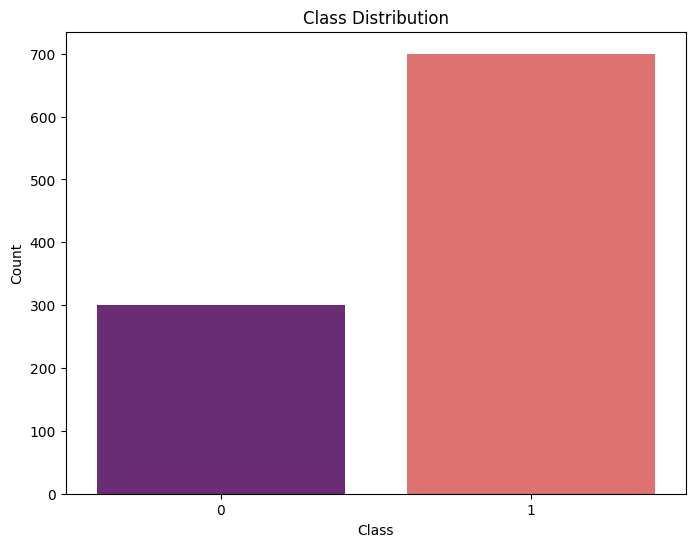

In [1003]:
# Class distribution

fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x="class", data=cleaned2, ax=ax, palette='magma')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

<b>Conclusion:</b></br>
We can see that our dataset is unbalanced, as the number of people classified as lower credit risk (good) is much higher than higher credit risk (bad).</br> This will be important in further analysis.

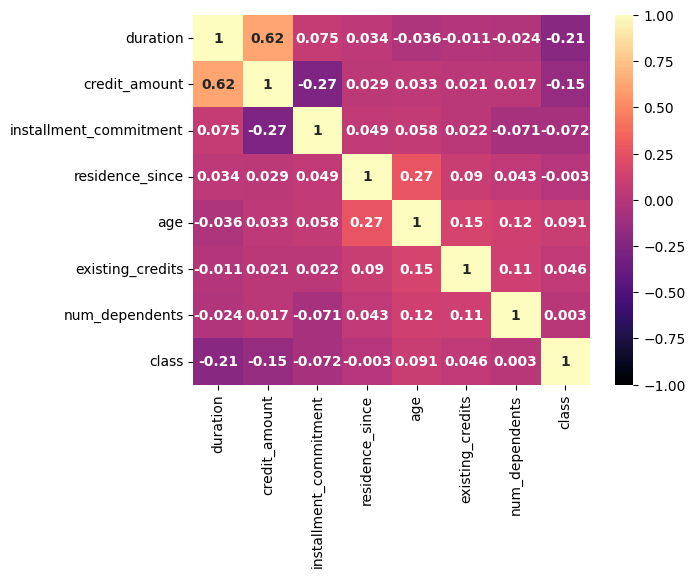

In [1005]:
# Correlation

corr = cleaned.corr()
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap = "magma", annot_kws={'fontsize':10, 'fontweight':'bold'})
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
pass

Conclusion:</br>
- The 'class' variable doesn't have a strong correlation with any of the other variables.</br>
- The strongest correlation is between 'credit_amount' and 'duration' (0.62).

## Histograms of numerical data

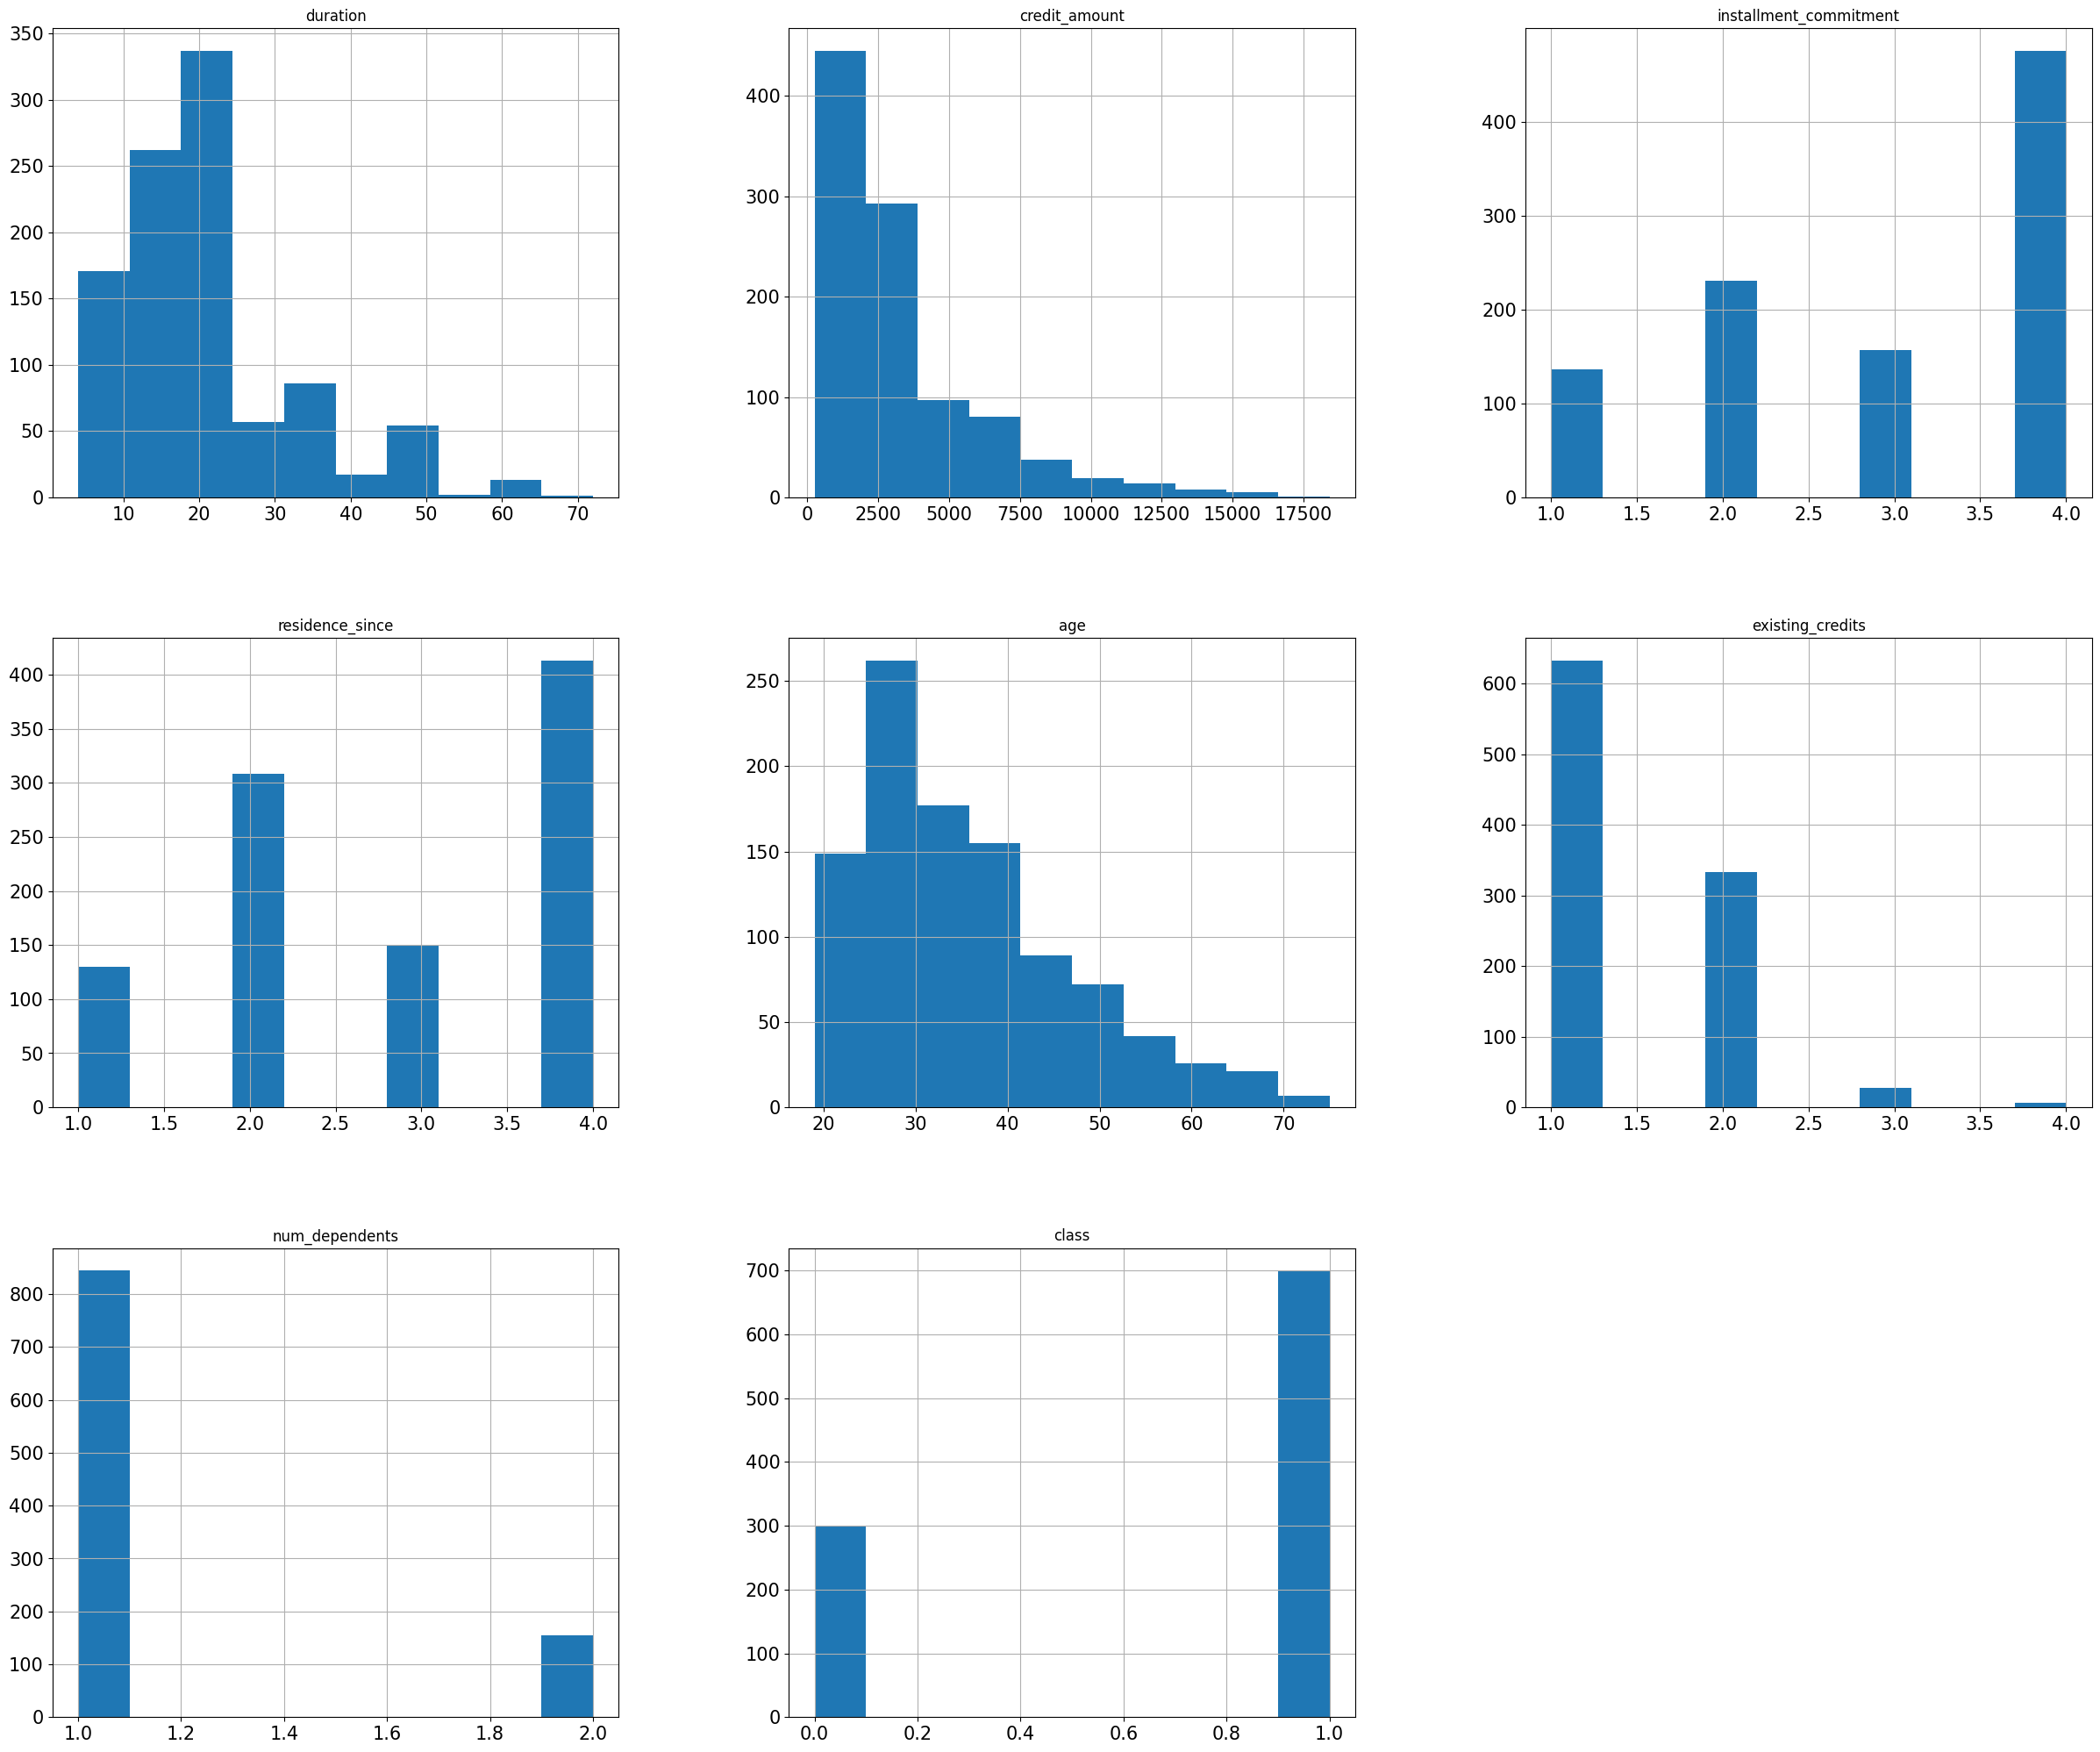

In [1006]:
# Histograms of numerical data

cleaned.hist(bins=10, figsize=(30,25), ylabelsize=15, xlabelsize=15)
plt.show()

<b>Conclusion:</b><br>
- The biggest data spread is in the columns: duration, credit_amount, and age.<br>
- Data in the columns: installment_comitions, residence_since, existing_credits, num_dependents are divided into several categories.

## Histograms of categorical data

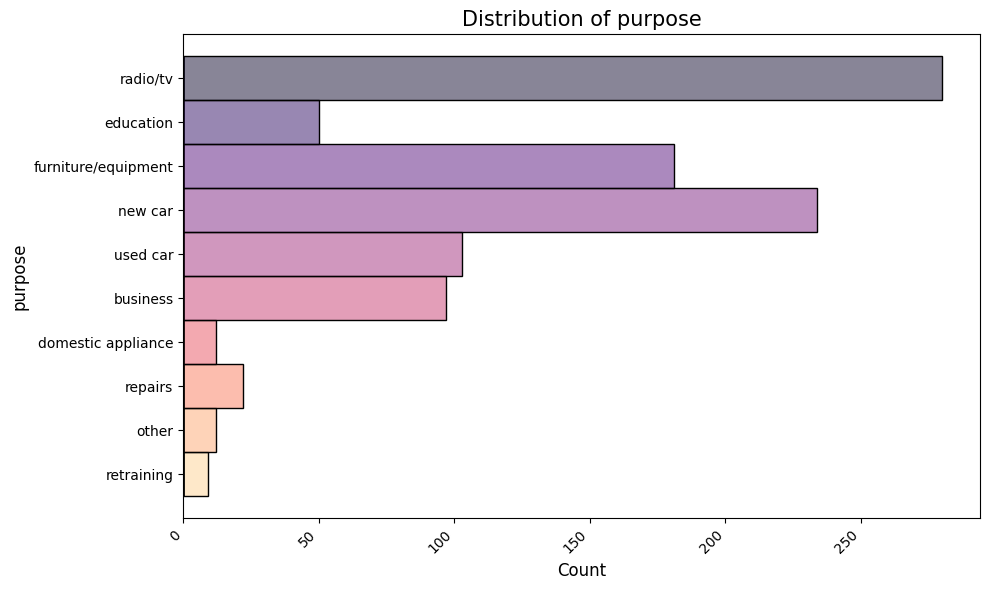

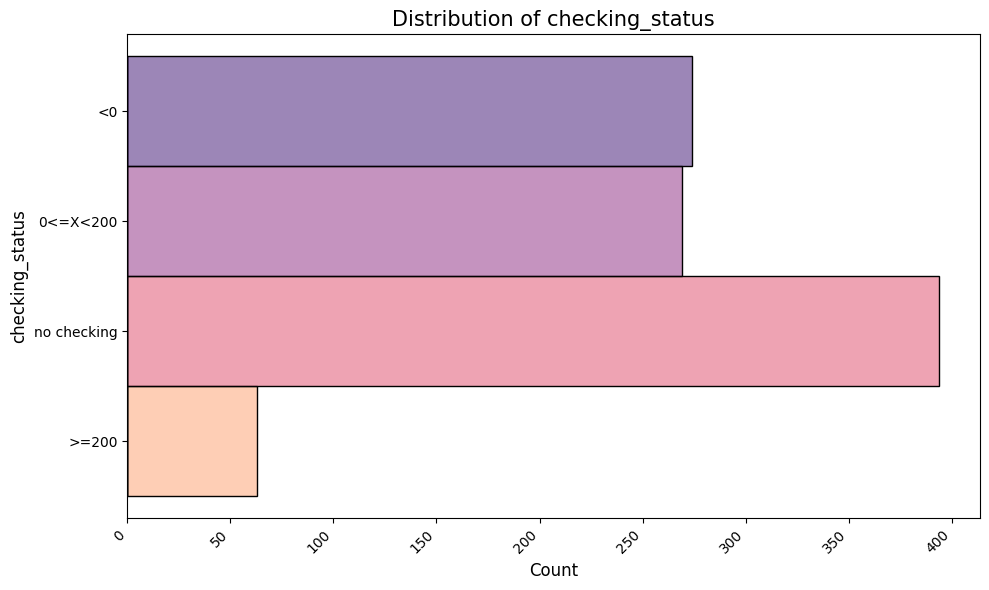

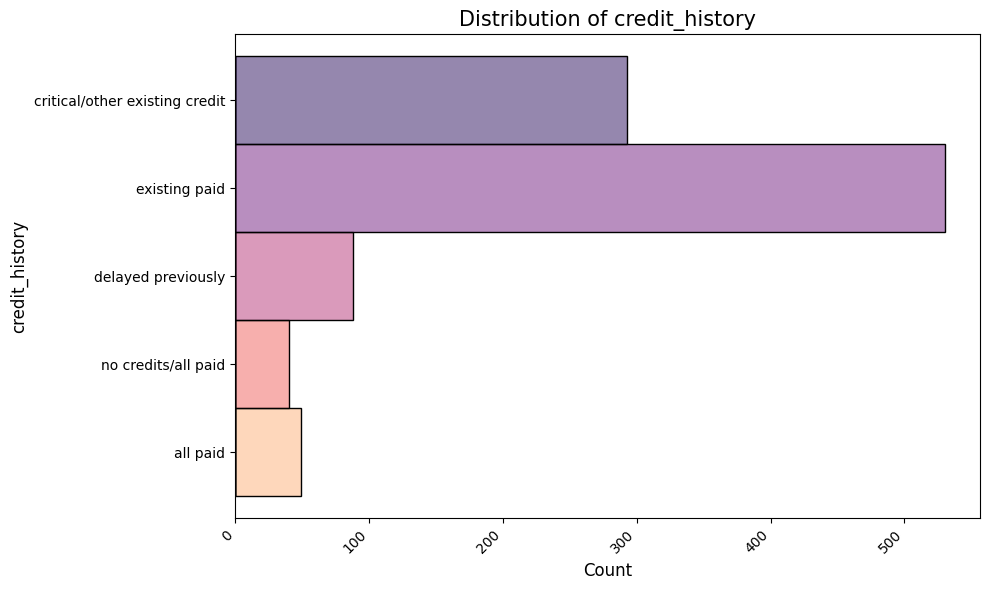

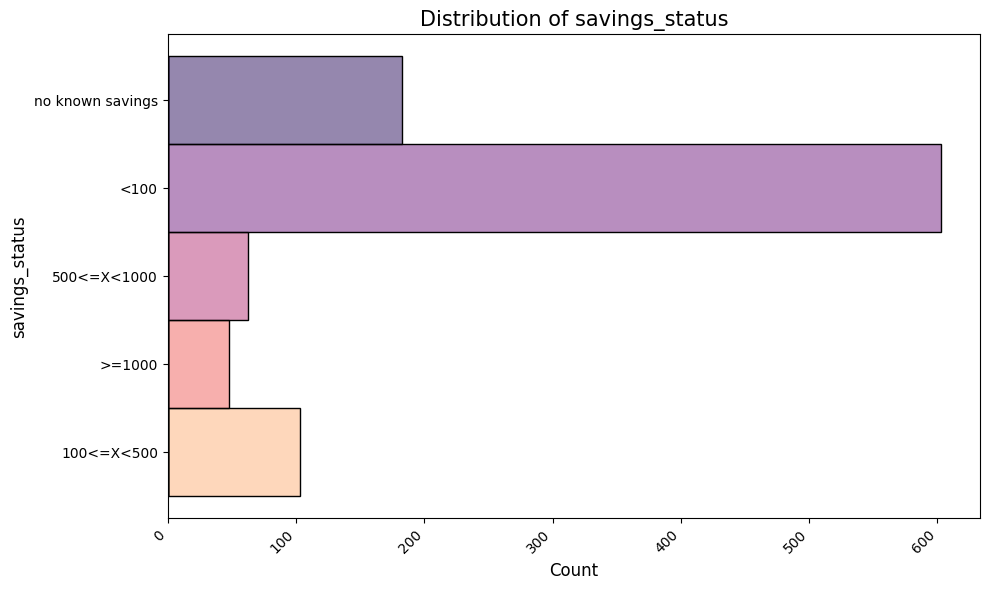

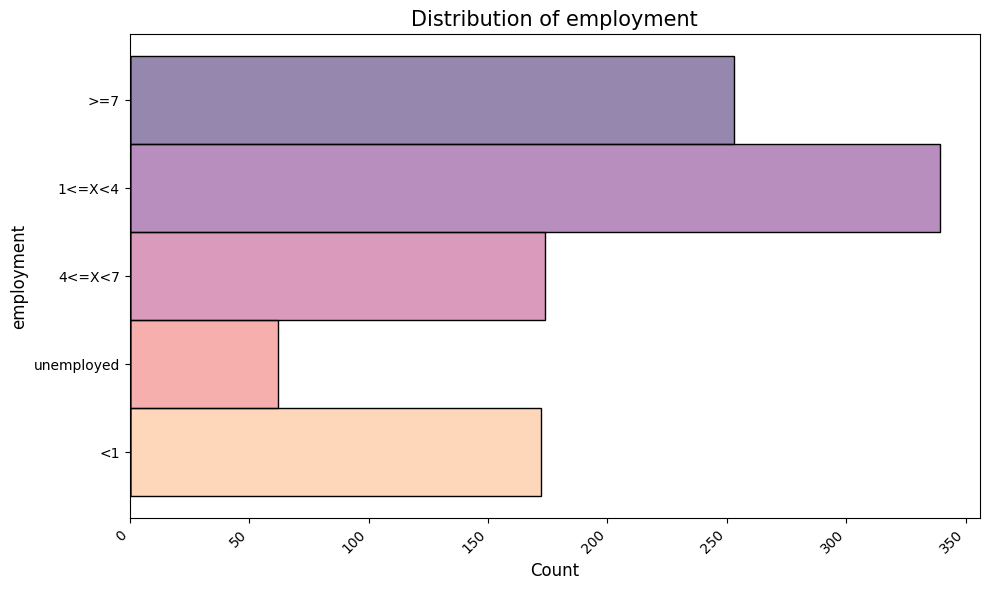

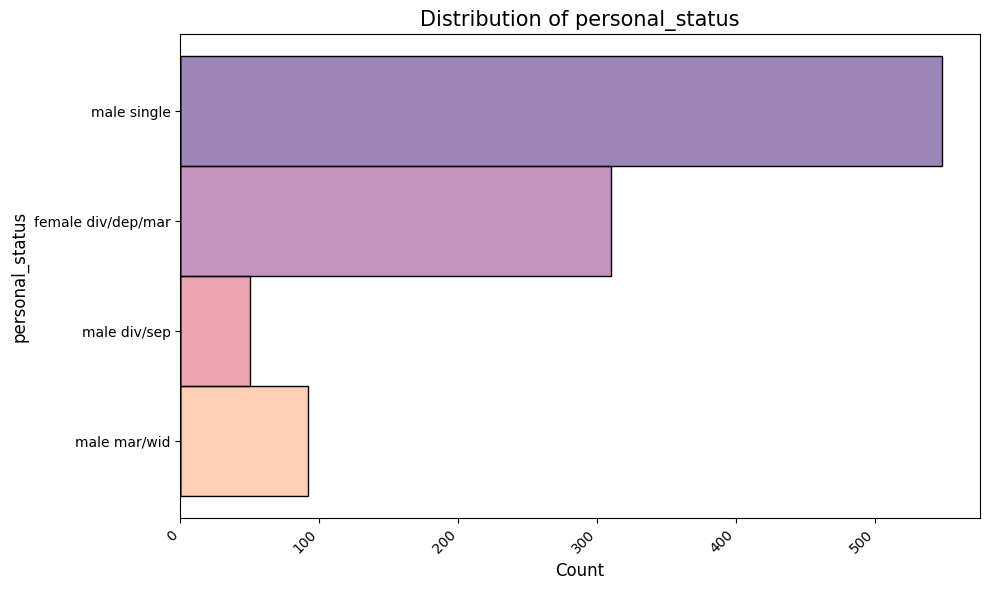

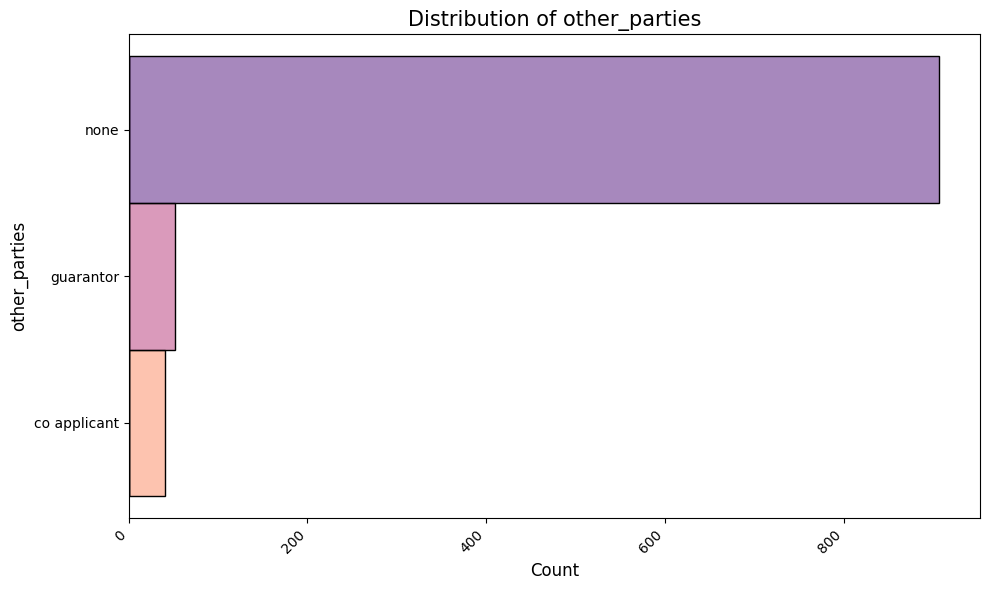

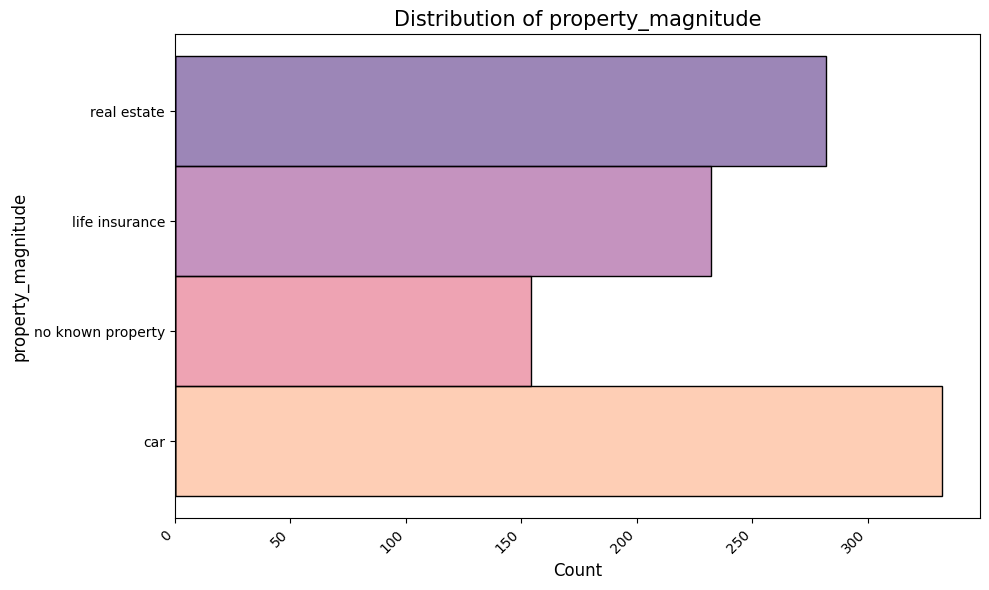

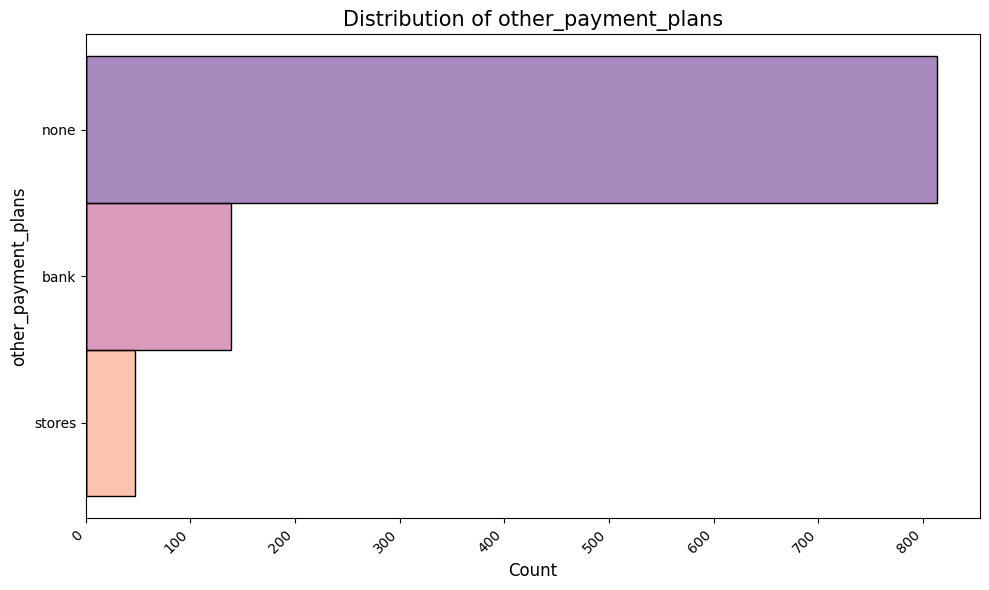

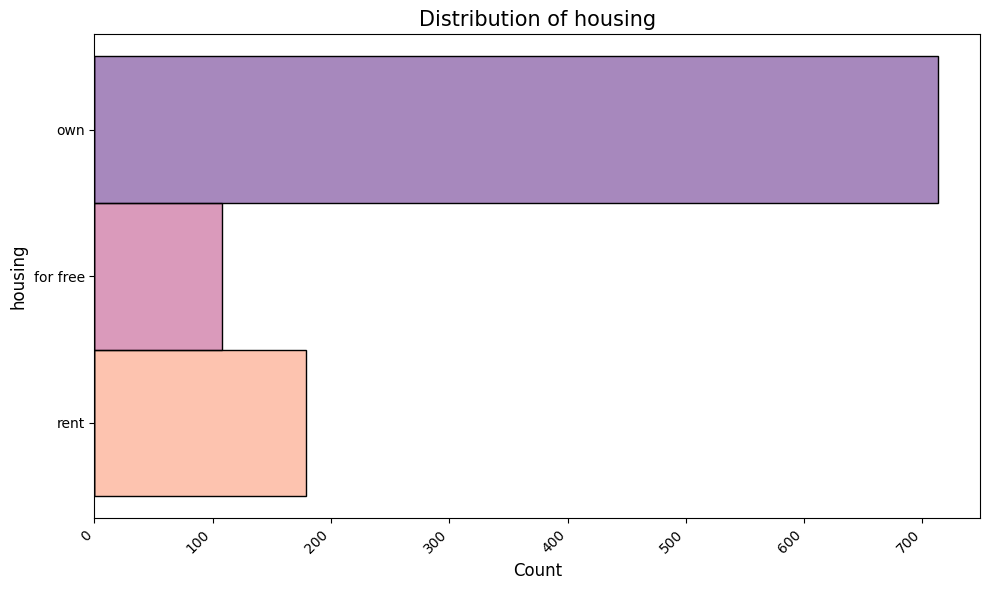

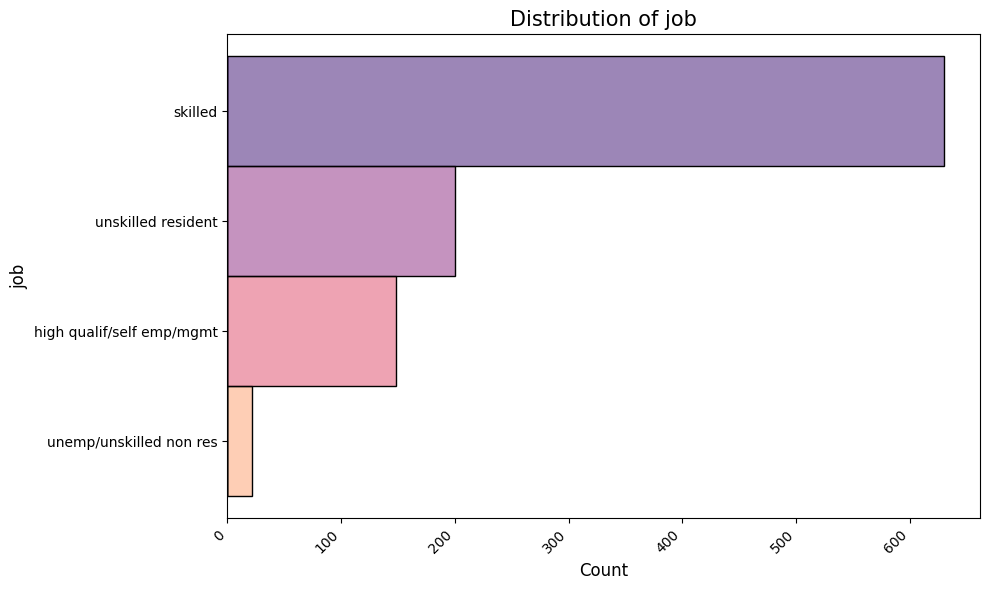

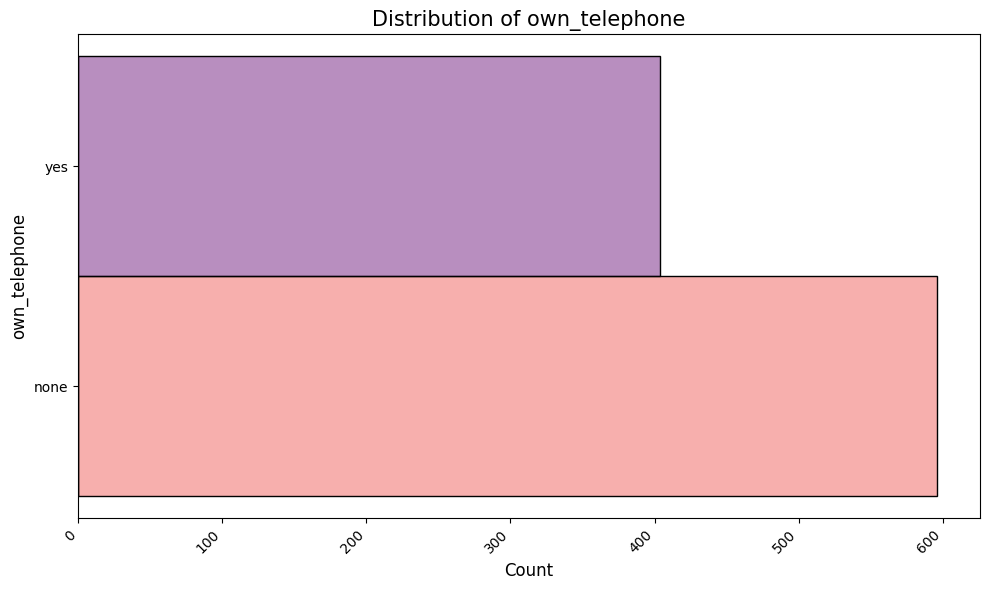

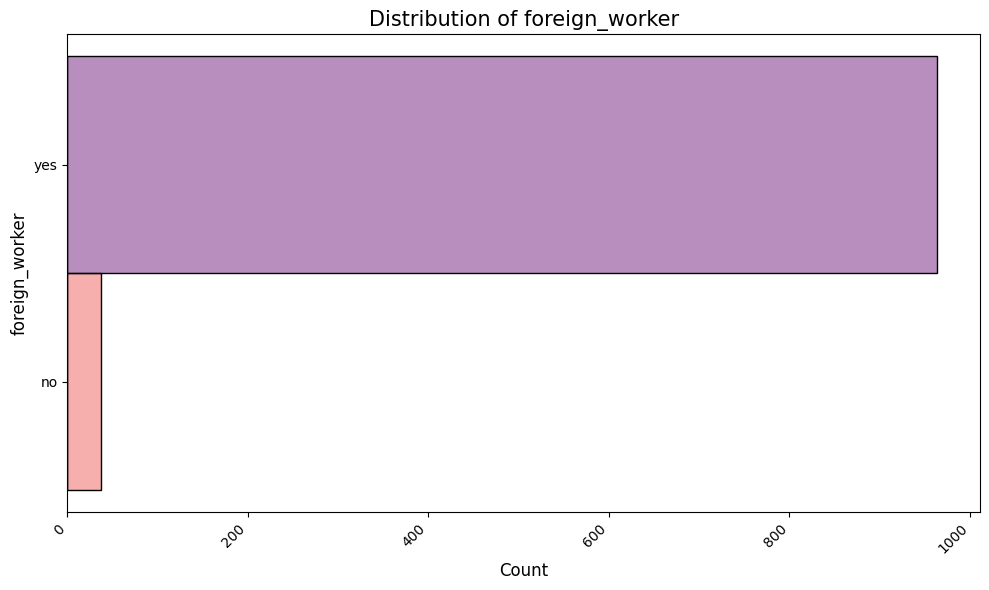

In [892]:
# Creating histograms for categorical data

var1 = ['purpose', 'checking_status', 'credit_history', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']

for var in var1:

    plt.figure(figsize=(10,6)) 
    sns.histplot(y=var, data=cleaned, bins=10, kde=False, hue=var, palette='magma', legend=False)
    plt.xticks(rotation=45, ha="right", fontsize=10) 
    plt.yticks(fontsize=10) 
    plt.ylabel(f'{var}', fontsize=12) 
    plt.xlabel('Count', fontsize=12) 
    plt.title(f'Distribution of {var}', fontsize=15) 
    plt.tight_layout() 
    plt.show()

<b>Conclusion for purpose:</b><br>
The most common purposes among borrowers are radio/TV, new car, and furniture/equipment.<br>

<b>Conclusion for checking status:</b><br>
The most common checking status among borrowers is "no checking".<br>

<b>Conclusion for credit history:</b><br>
The most common credit history among borrowers is "existing paid".<br>

<b>Conclusion for savings status:</b><br>
The most common savings status among borrowers is "<100".<br>

<b>Conclusion for employment:</b><br>
The most common employment status among borrowers is "1<=x<4".<br>

<b>Conclusion for personal status:</b><br>
The most common personal status among borrowers is "male single".<br>

<b>Conclusion for other parties:</b><br>
The most common other parties involved among borrowers is "none".<br>

<b>Conclusion for other property magnitude:</b><br>
The most common property magnitude among borrowers is "car".<br>

<b>Conclusion for other payment plans:</b><br>
The most common other payment plans among borrowers is "none".<br>

<b>Conclusion for housing:</b><br>
The most common type of housing among borrowers is "own".<br>

<b>Conclusion for job:</b><br>
The most common job among borrowers is "skilled".<br>

<b>Conclusion for own telephone:</b><br>
The most common ownership status of telephone among borrowers is "none".<br>

<b>Conclusion for foreign worker:</b><br>
The most common foreign worker status among borrowers is "yes".<br>

The above conclusions can inform us about which individuals are most likely to receive a loan.

## Boxplots of numerical data

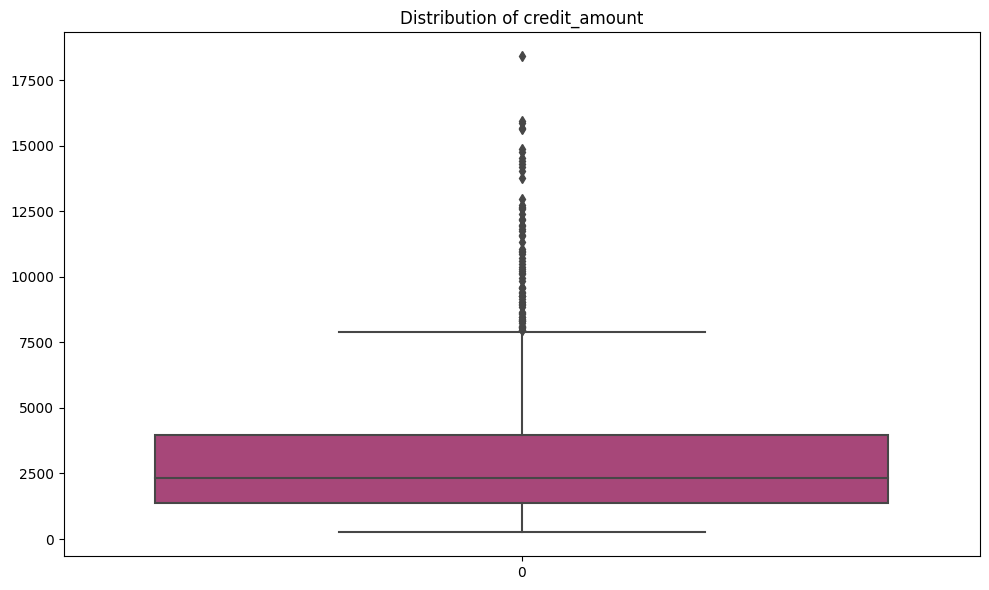

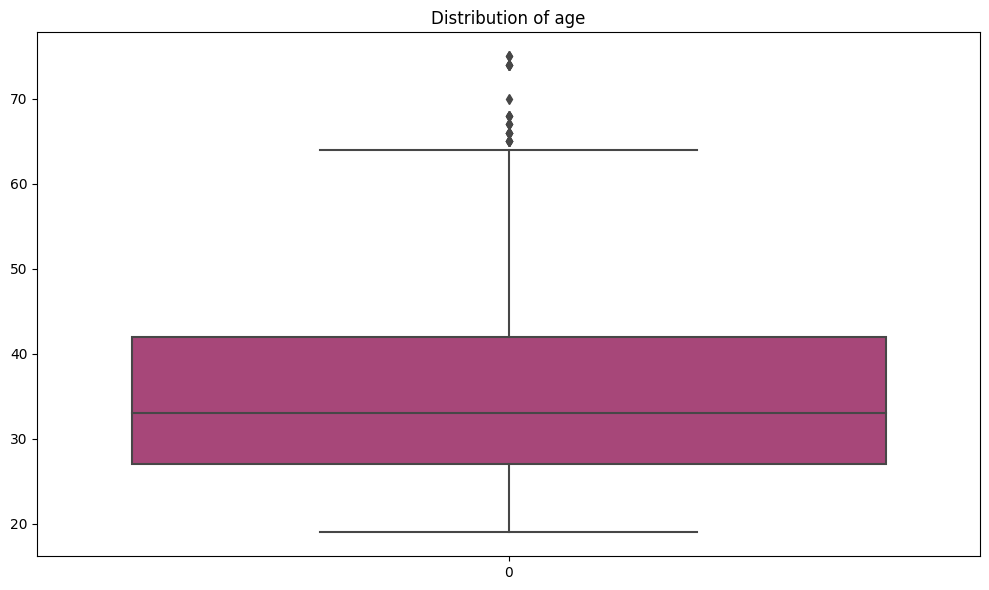

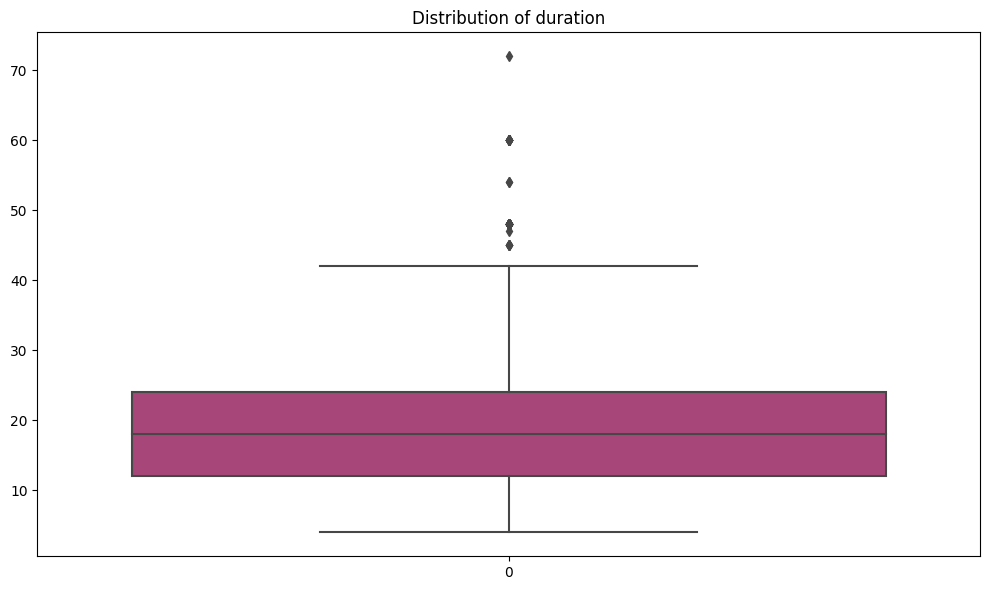

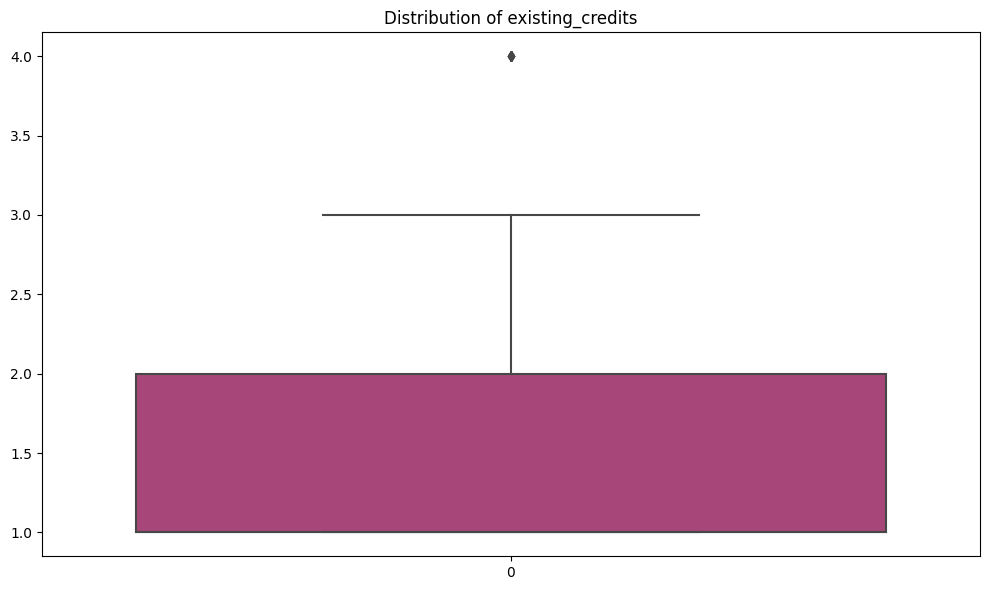

In [1007]:
# Creating a boxplots for the variables: "credit_amount", "age", "duration"

var2 = ['credit_amount', 'age', 'duration', 'existing_credits']

for var in var2:
    plt.figure(figsize=(10, 6))
    sns.boxplot(cleaned[var], palette='magma')
    plt.title(f'Distribution of {var}')
    plt.tight_layout()

<b>Conclusion for credit_amount:</b><br>
- The data shows a large number of outliers, but we cannot remove the outliers in this case because it would result in inaccurate data.<br>
- The most common loans are taken out for small amounts.<br>

<b>Conclusion for age:</b><br>
- We have outliers, but we cannot remove the outliers in this case because it would result in inaccurate data.<br>
- The most common borrowers of loans are people between 30 and 40 years old.<br>

<b>Conclusion for duration:</b><br>
- We have outliers, but we cannot remove the outliers in this case because it would result in inaccurate data.<br>
- The most common loan duration is 15-25 years.<br>

<b>Conclusion for existing_credits:</b><br>
- We have almost no outliers.<br>
- The most common number of existing loans among borrowers is 1-2.

## Boxplots of categorical data with an additional dependent variable 

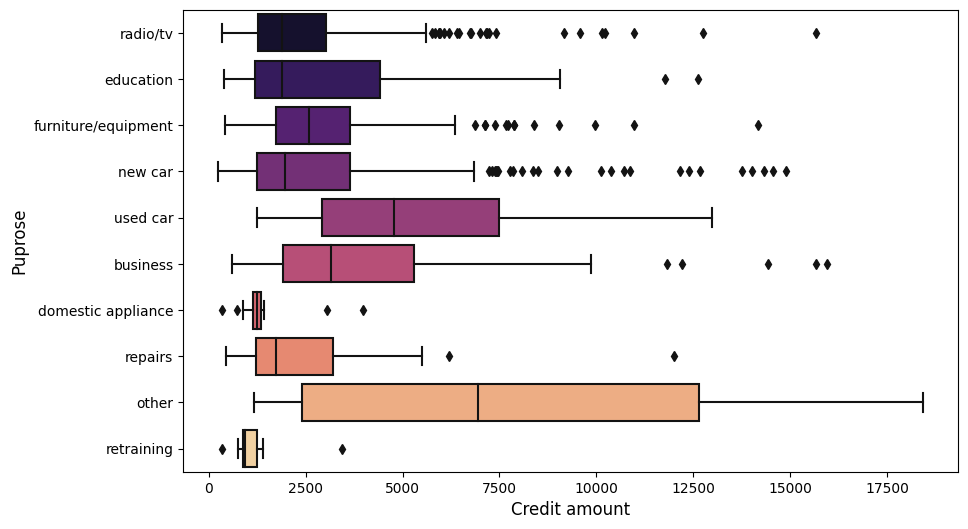

In [470]:
# Creating a boxplot with credit amount and purpose 

plt.figure(figsize=(10, 6))
sns.boxplot(x='credit_amount', y='purpose', data=cleaned, palette='magma')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10) 
plt.ylabel('Puprose', fontsize=12)
plt.xlabel('Credit amount', fontsize=12) 
plt.show()

<b>Conclusion:</b><br>
- The largest differencies in loan amount are for the purpose of "other" and "used cars"..<br>
- The smallest credit amount ranges are for the purposes: domestic appliance and retraining.

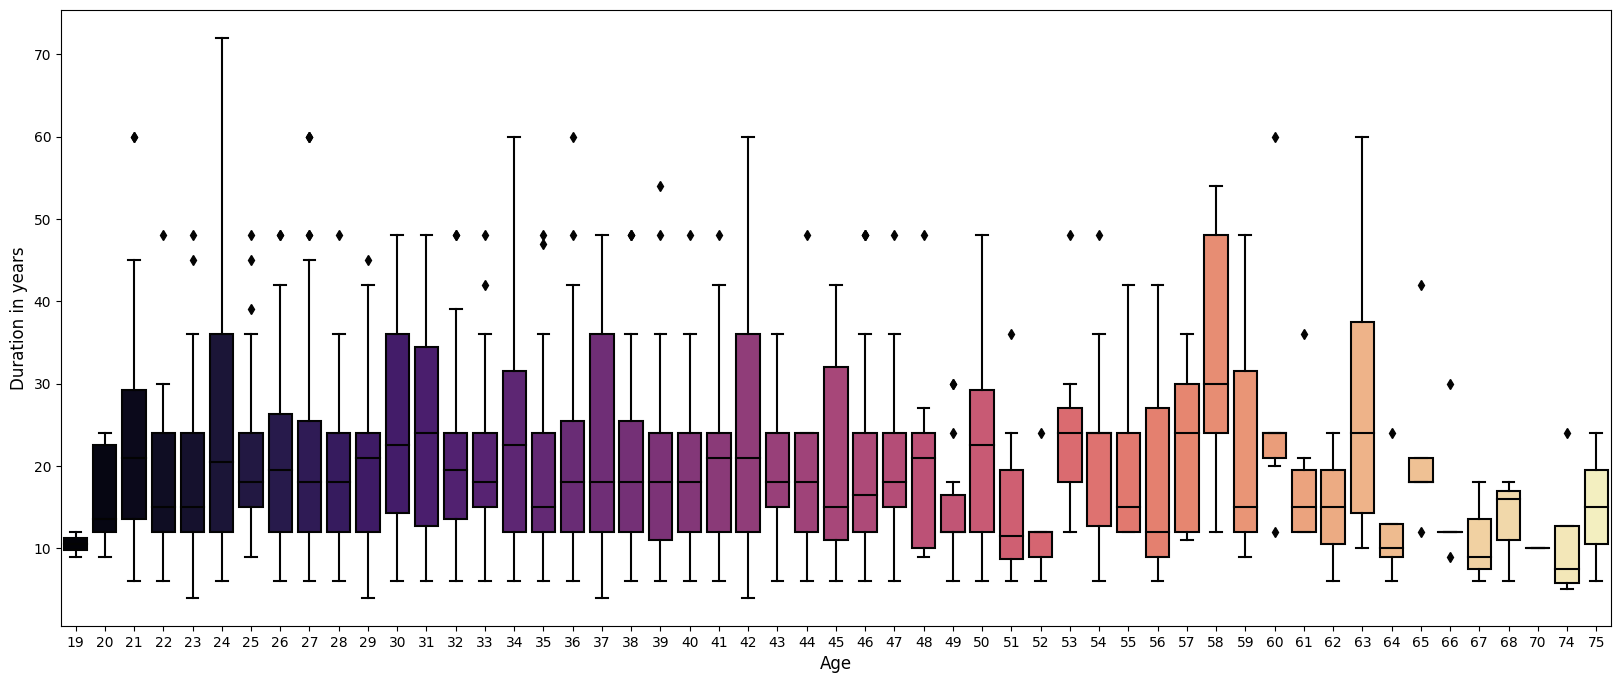

In [1008]:
# Creating a boxplot with duration and age

plt.figure(figsize=(20, 8))
sns.boxplot(x='age', y='duration', data=cleaned, palette='magma')
plt.yticks(fontsize=10) 
plt.xticks(fontsize=10) 
plt.ylabel('Duration in years', fontsize=12) 
plt.xlabel('Age', fontsize=12) 
plt.show()

<b>Conclusion:</b><br>
- The largest variations in loan duration can be observed for individuals between the ages of 50 and 75.<br>
- Individuals up to the age of 50 most often take out loans in the range of 15-35 years.

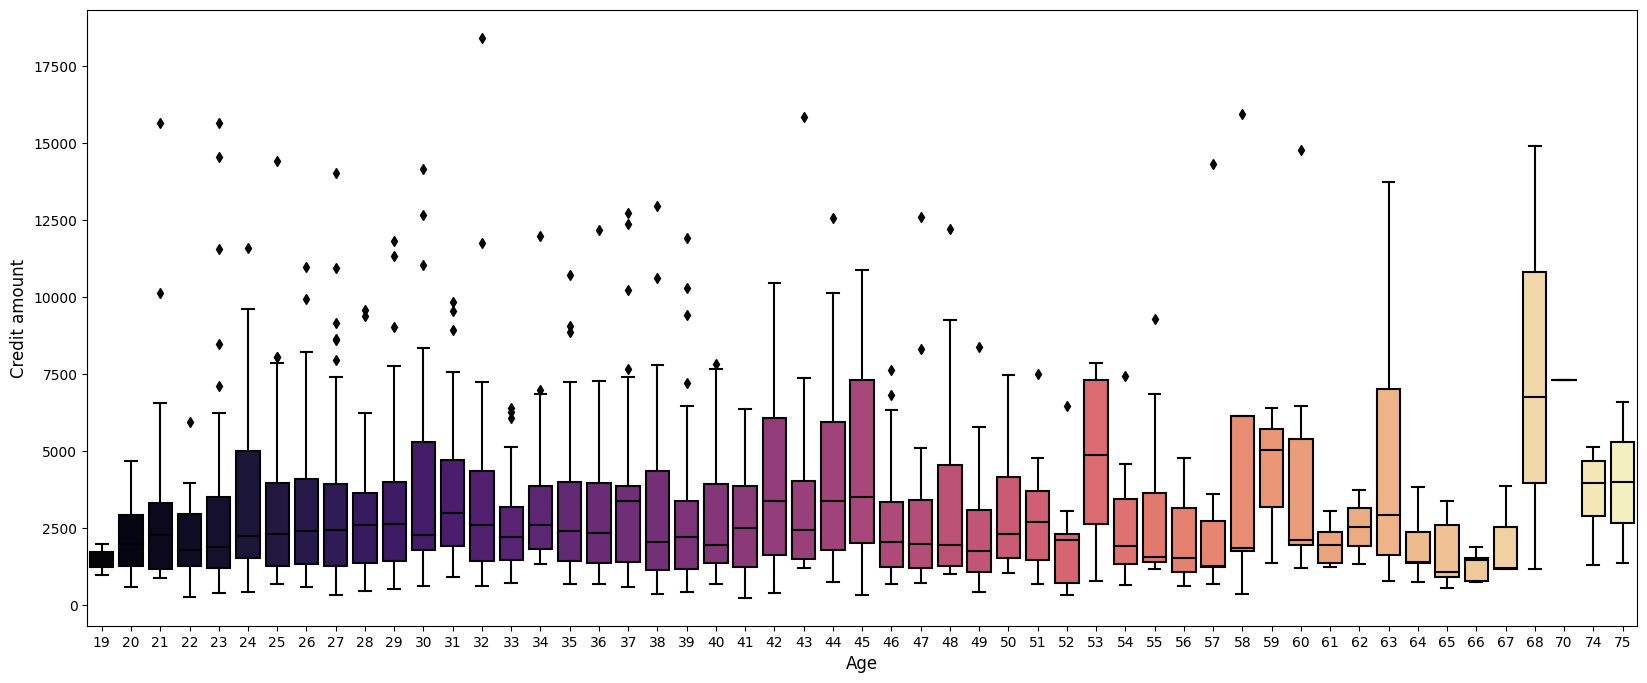

In [894]:
# Creating a boxplot with credit amount and age 

plt.figure(figsize=(20, 8))
sns.boxplot(x='age', y='credit_amount', data=cleaned, palette='magma')
plt.yticks(fontsize=10) 
plt.xticks(fontsize=10) 
plt.ylabel('Credit amount', fontsize=12)
plt.xlabel('Age', fontsize=12) 
plt.show()

<b>Conclusion:</b><br>
- Individuals up to the age of 40 most often take out loans up to 5000.<b>
- From the age of 40 larger varriances in data appear.

# Multivariate Analysis

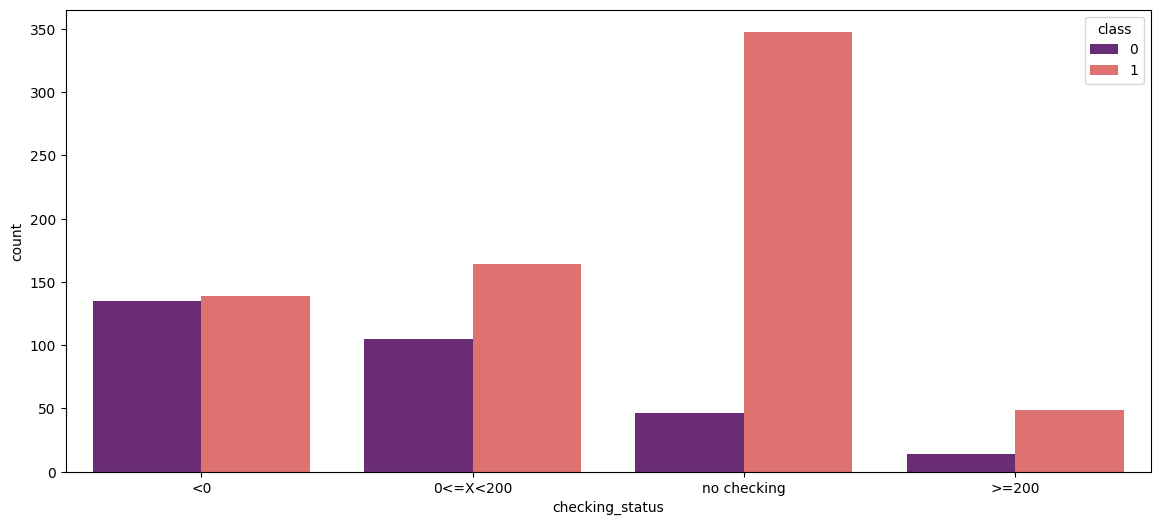

In [478]:
# The distribution of the variable 'checking_status' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='checking_status', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

Conclusion: </br>
- Individuals who have very low funds in their account ('<0') have a significantly higher chance of defaulting on the credit.</br>
- Individuals who do not have a bank account (variable 'checking_status' == 'no checking') have the highest chance of repaying the loan.

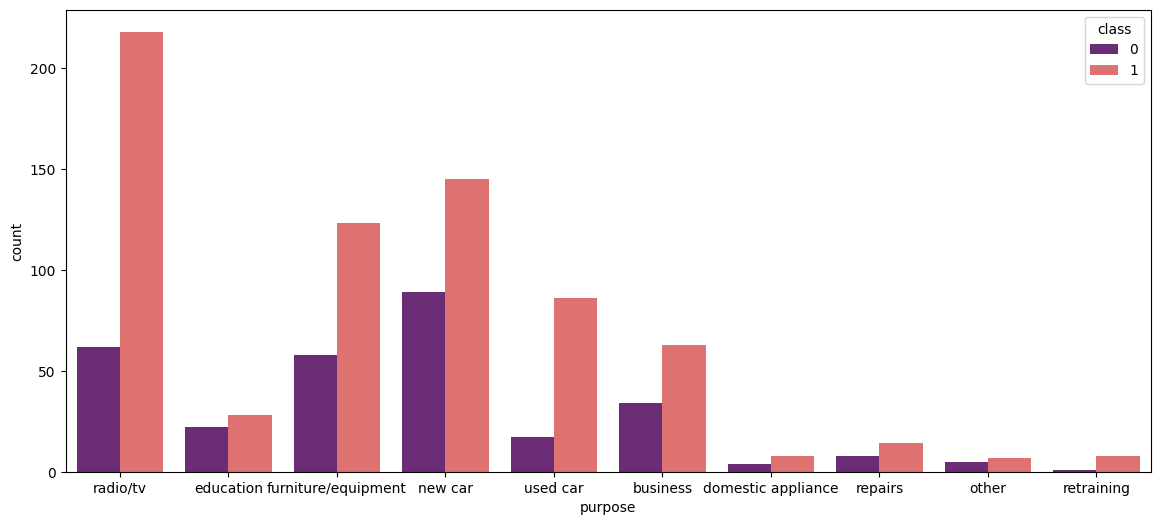

In [479]:
# The distribution of the variable 'purpose' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))

sns.countplot(x='purpose', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

Conclusion: </br>
- The highest chance of loan repayment is for the purchases of: radio/tv and used car.

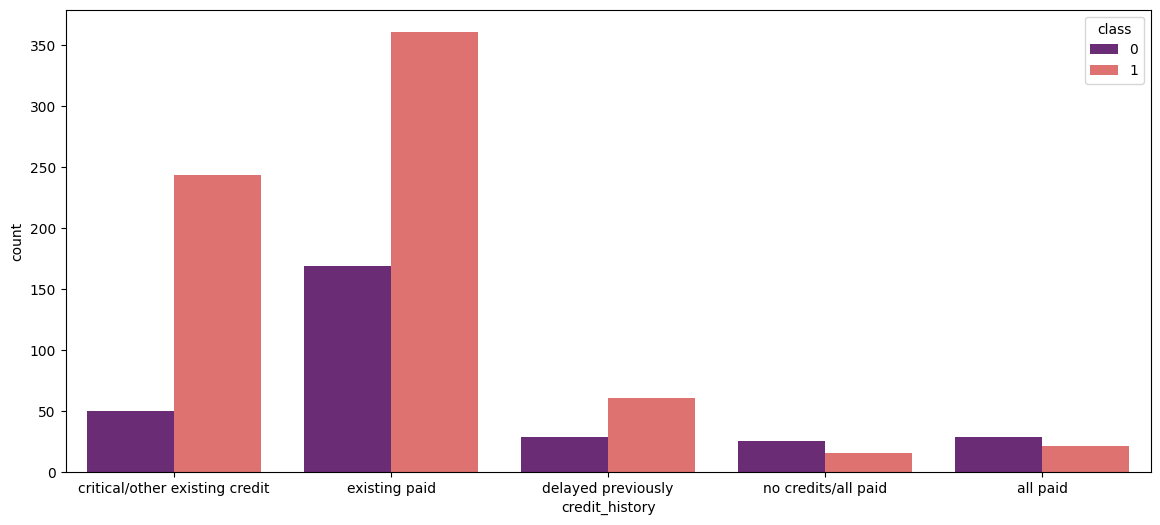

In [480]:
# The distribution of the variable 'credit_history' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='credit_history', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

Conslusion:</br>
- People with a credit history of 'critical/other existing credit' have a greater chance of repaying the loan

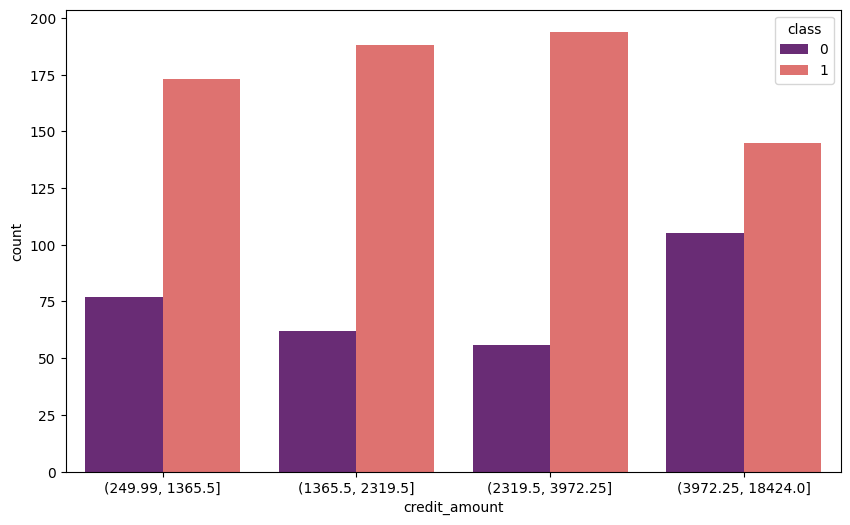

In [895]:
# Dividing into 4 baskets
cleaned['credit_amount'] = cleaned['credit_amount'].astype(int)
bins = pd.qcut(cleaned['credit_amount'], 4, precision=2) #Dividing the data into 4 quartiles results in a better distribution of the data with an equal number of elements

#The distribution of the variable 'credit_amount' based on the variable 'class'
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x=bins, hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

pd.options.mode.chained_assignment = None  # ignoring warning

Conclusion:</br>
- The highest loan amount has the greatest risk of loan approval.

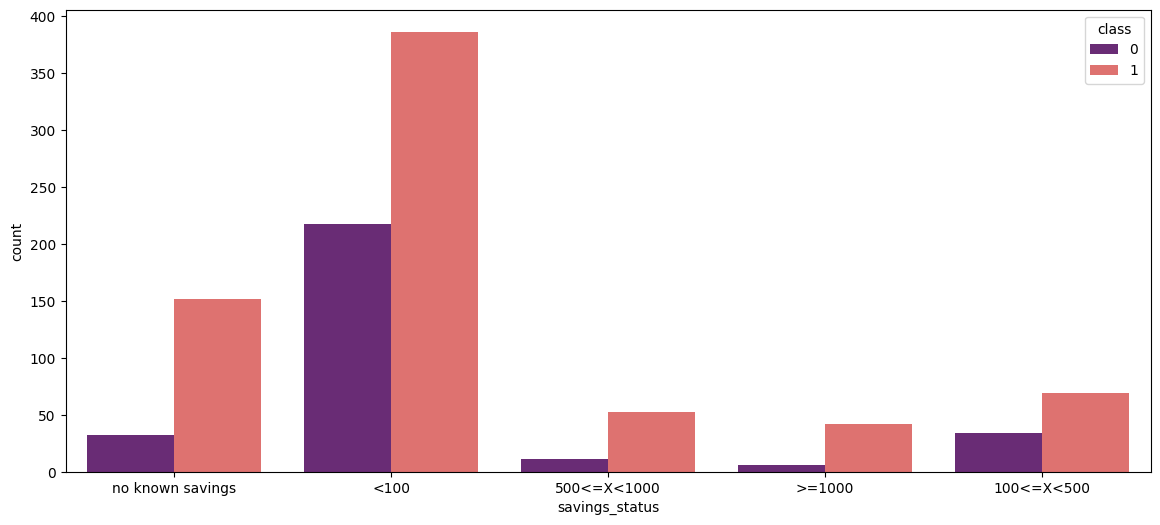

In [485]:
#The distribution of the variable 'savings_status' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='savings_status', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

Conclusion:</br>
- The greatest risk of loan approval is associated with savings_status < 100

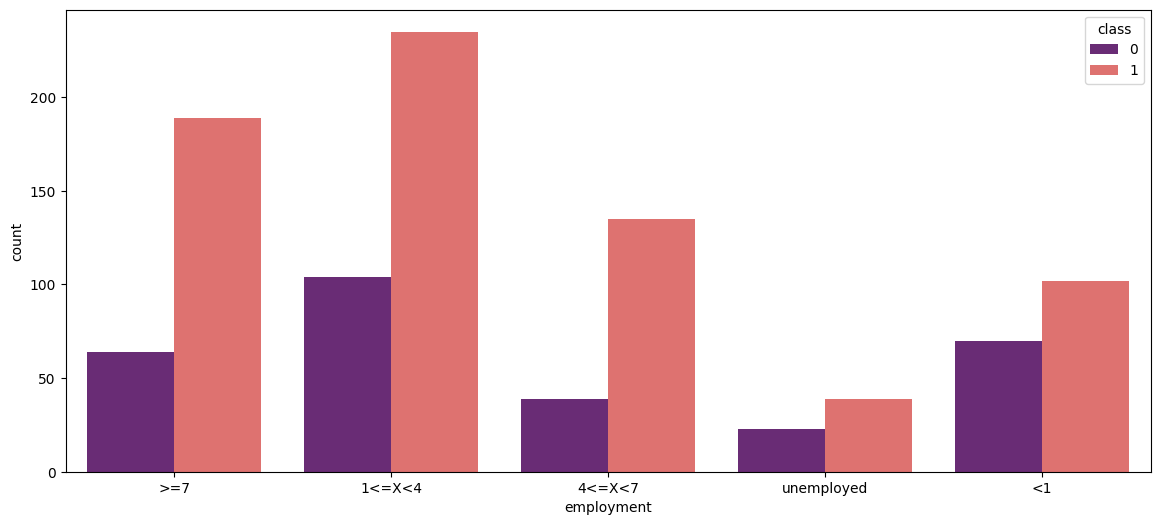

In [486]:
#The distribution of the variable 'employment' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='employment', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

<b>Conclusion:</b></br>
The lowest risk of loan approval is associated with employment status: 4<=X<7,  1<=X<4m >=7

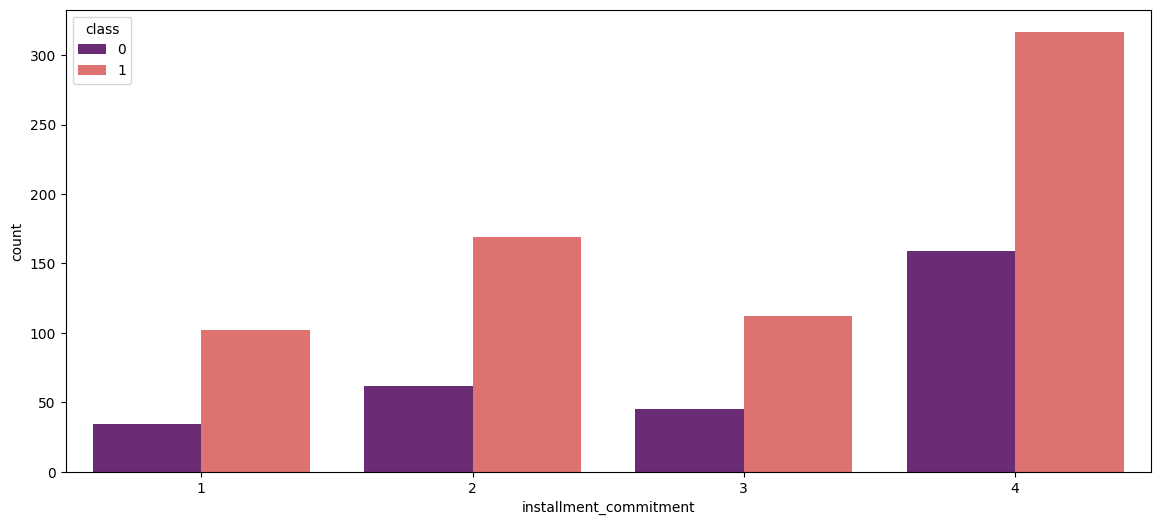

In [487]:
#The distribution of the variable 'installment_commitment' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='installment_commitment', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

<b>Conclusion:</b>
</br>
The higher the installment commitment is, the lower the credit risk

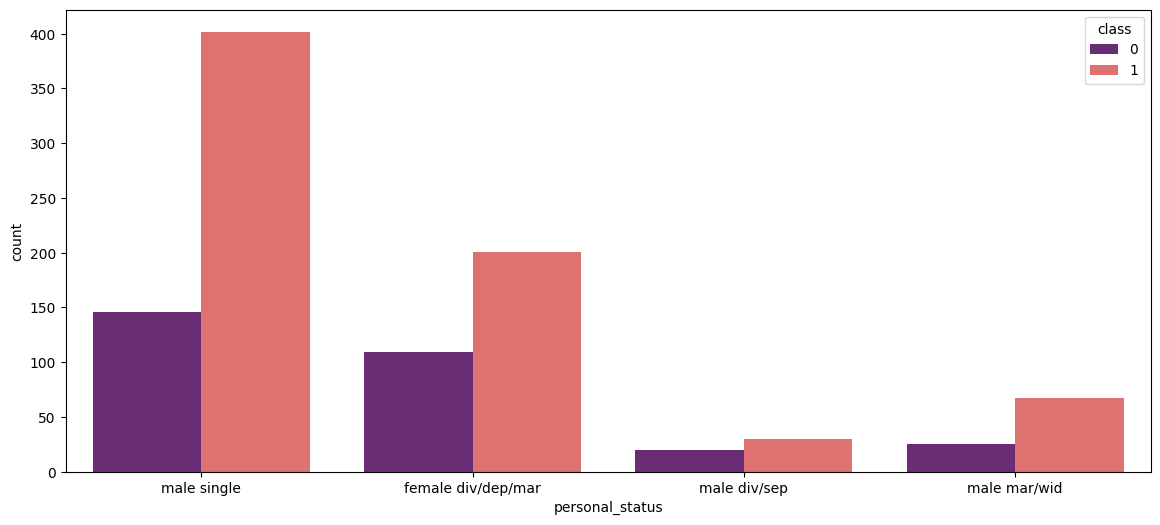

In [1009]:
#The distribution of the variable 'personal_status' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='personal_status', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

Conclusion:</br>
- The lowest credit risk is for the group of male single

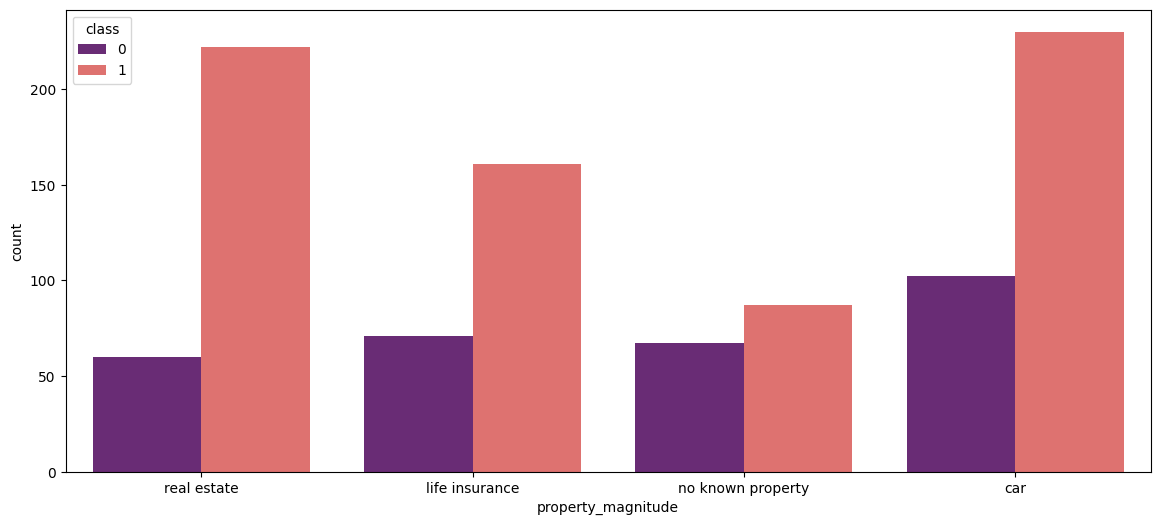

In [491]:
#The distribution of the variable 'property_magnitude' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='property_magnitude', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

<b>Concluion:</b><br>
- Good credit borrowers are usually individuals with a  property magnitude, such as real estate or a car.

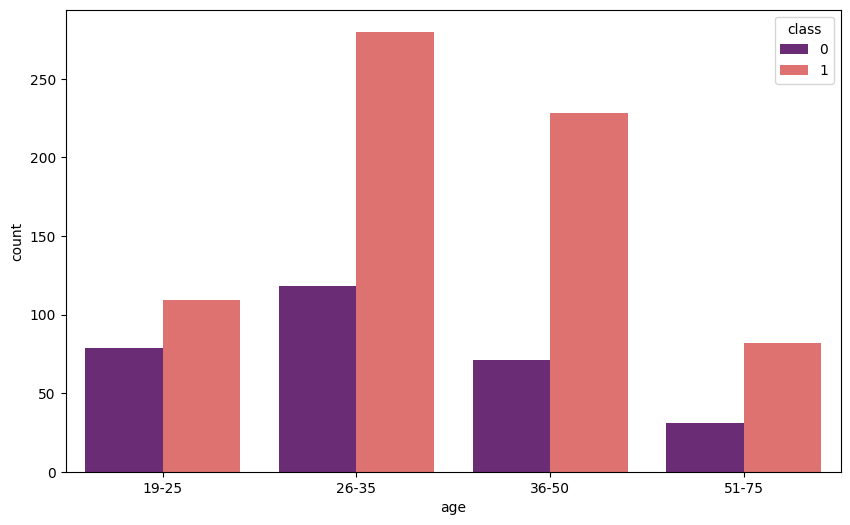

In [1010]:
#The distribution of the variable 'age' based on the variable 'class'

cleaned['age'] = cleaned['age'].astype(int)

bins= [19,25,35,50,75]
labels = ['19-25', '26-35', '36-50', '51-75']

bins = pd.cut(cleaned['age'], bins=bins, labels=labels, right=True) #dzieli dane na 4 kwartyle, lepiej wyglada wtedy rozklad danych, ta sama liczba elementow

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x=bins, hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

pd.options.mode.chained_assignment = None  # ignoring warning

<b>Conclusion:</b><br>
- Good credit borrowers tend to be 26-35 year olds and 36-50 year olds

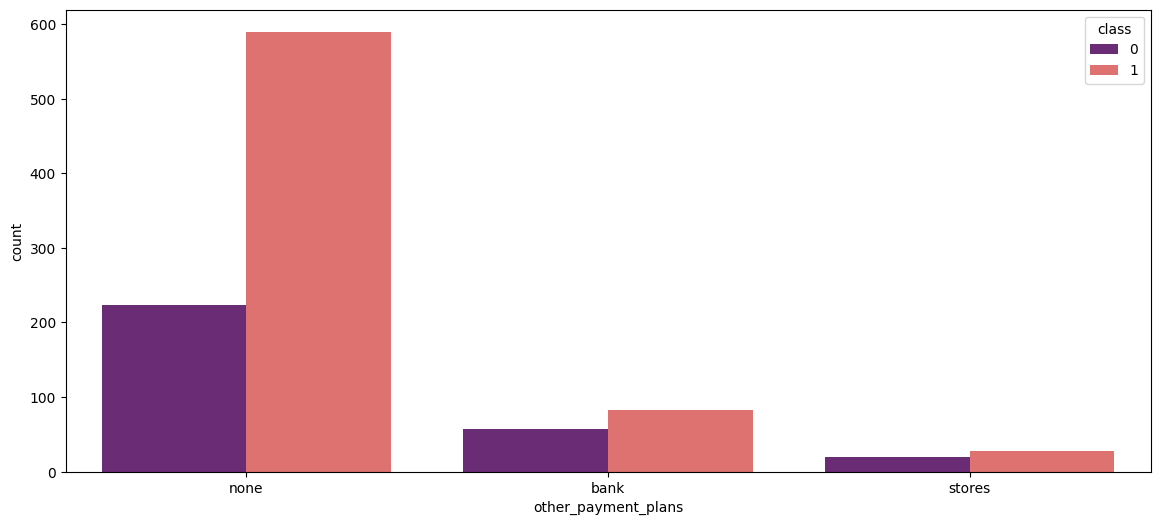

In [495]:
#The distribution of the variable 'other_payment_plans' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='other_payment_plans', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

<b>Conclusion:</b><br>
- Good credit borrowers are usually those with other_payment_plans as 'none'

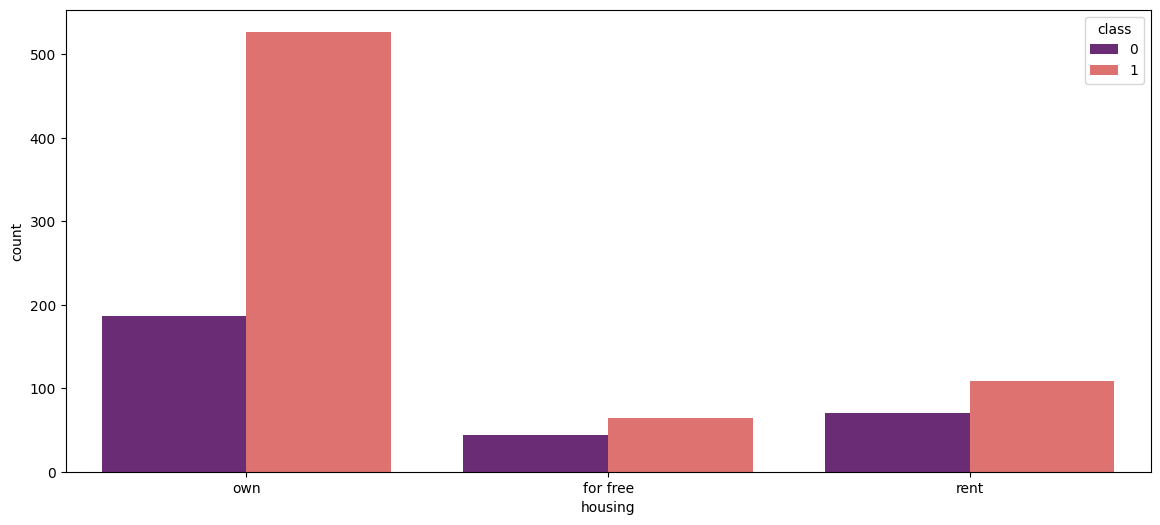

In [1011]:
#The distribution of the variable 'housing' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='housing', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

<b>Conclusion:</b><br>
- Good borrowers are usually people who own a house

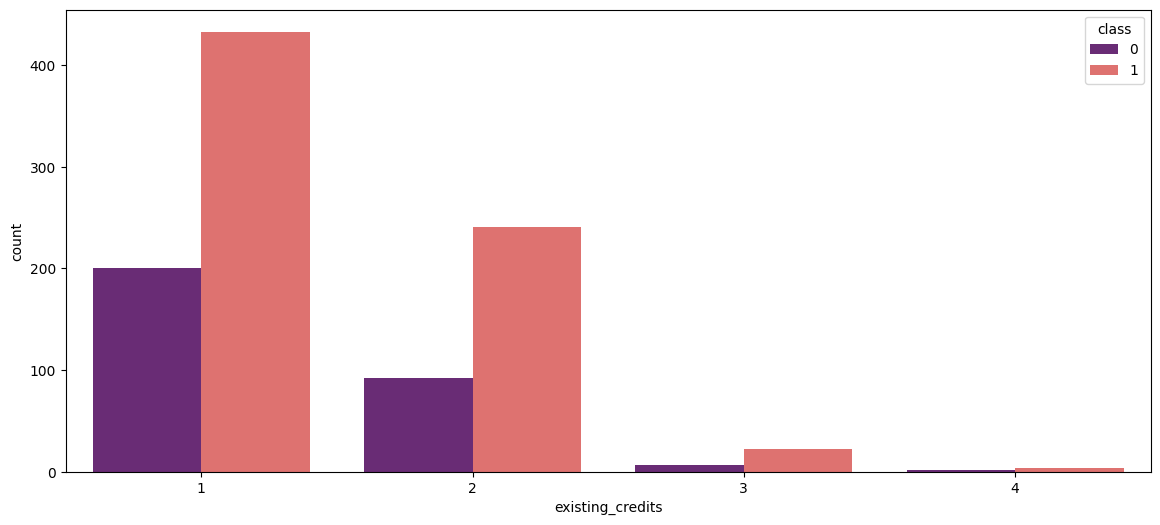

In [497]:
#The distribution of the variable 'existing_credits' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='existing_credits', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

<b>Conclusion:<b><br>
- Good credit borrowers are usually people who have 1-2 loans with this bank

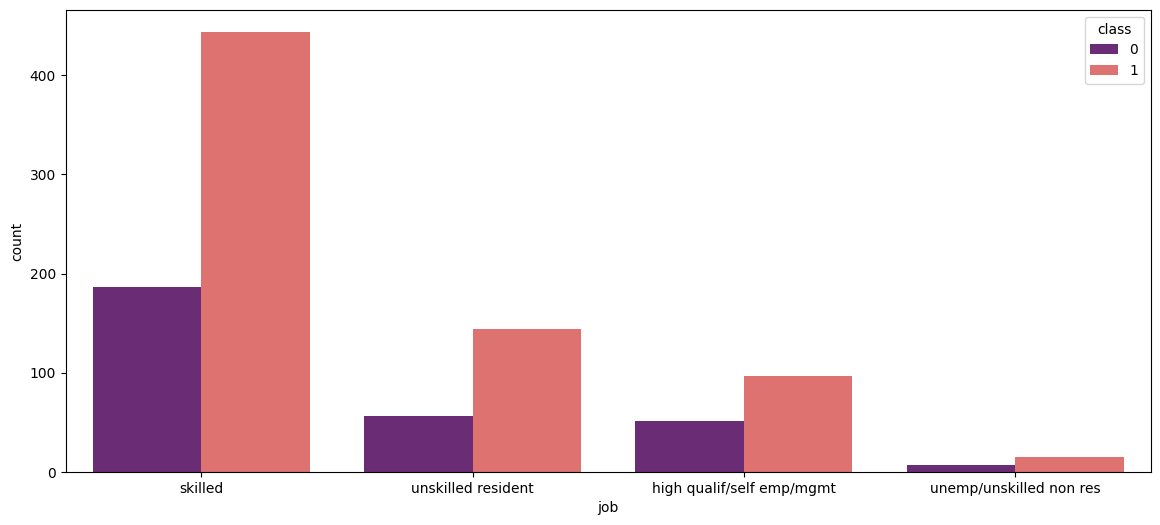

In [1012]:
#The distribution of the variable 'job' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='job', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

<b>Conclusion</b><br>
- Skilled employees are usually good credit borrowers

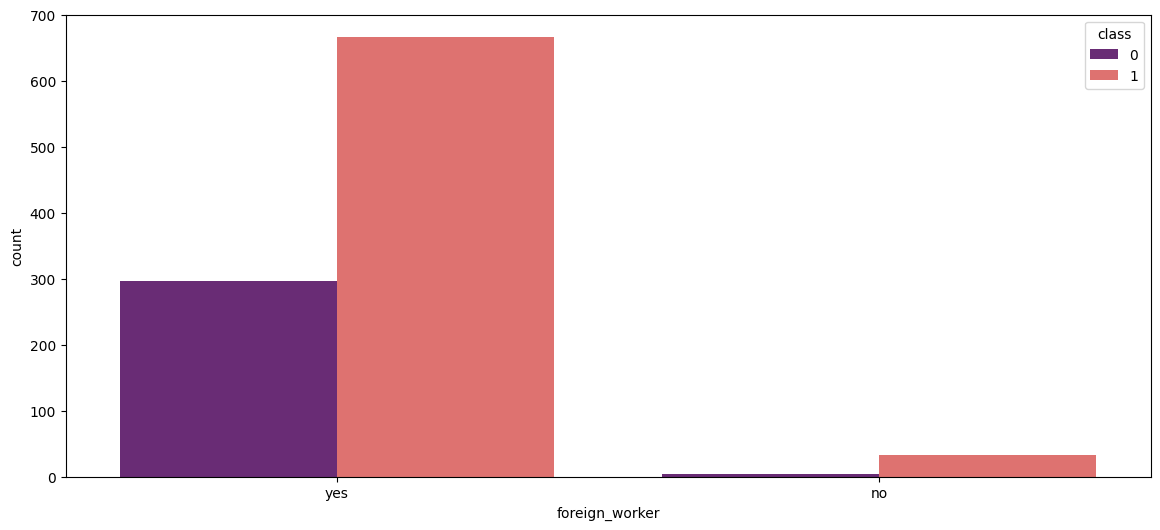

In [1013]:
#The distribution of the variable 'foreign_worker' based on the variable 'class'

fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='foreign_worker', hue='class', data=cleaned, ax=ax, palette='magma')
plt.show()

<b>Conclusion:</b><br>
- Good credit borrowers are usually foreign workers.

## Logistic Regression

In [1016]:
cleaned2.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,savings_status_100<=X<500,savings_status_500<=X<1000,savings_status_<100,savings_status_>=1000,savings_status_no known savings,employment_1<=X<4,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,personal_status_female div/dep/mar,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_co applicant,other_parties_guarantor,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes,class
0,6,1169,4,4,67,2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1
1,48,5951,2,2,22,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1
3,42,7882,2,4,45,1,2,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1
4,24,4870,3,4,53,2,2,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0


In [1017]:
# Set X and y variables from the dataframe
X = cleaned2.iloc[:,:-1]
y = cleaned2.iloc[:,-1]

### Training and predicting

In [1018]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [1019]:
model = LogisticRegression(C=200, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(C=200, max_iter=1000)

In [942]:
model.coef_

array([[-1.92335268e-02, -1.34340219e-04, -3.06492667e-01,
        -3.57763946e-02,  3.33313476e-02, -3.62870715e-01,
        -1.02503000e-01, -1.38060479e-01, -6.50520112e-01,
         4.13016390e-01,  8.66416437e-01, -4.59358392e-01,
         1.10286432e+00,  4.28877604e-01,  7.85665334e-02,
        -6.60097826e-01, -6.42065288e-02, -4.46714356e-02,
        -8.02437226e-01,  4.87563000e-01, -6.80918137e-01,
         1.23405393e-01,  2.94908678e-01, -2.31469516e-01,
         2.18706917e-01,  1.18997109e+00, -2.91136299e-01,
         1.46954788e-01, -2.82494903e-01,  4.67794062e-01,
         4.49734588e-01, -4.98986784e-02,  5.62770219e-01,
        -1.79183279e-04,  8.88732904e-02, -1.10713413e-01,
         1.77684407e-01, -3.97690305e-01,  5.94201653e-02,
         6.51437968e-01, -4.89807967e-02,  6.88608941e-01,
        -1.48775909e-01,  1.74278715e-01,  4.00695803e-02,
        -1.32574635e-01,  4.09078575e-01, -1.02292037e-01,
         6.36965804e-01, -4.38215316e-02,  8.76188397e-0

In [1020]:
model.intercept_

array([0.49106529])

In [1021]:
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

pred_train_probabilities = model.predict_proba(X_train)[:,1]
pred_test_probabilities = model.predict_proba(X_test)[:,1]

### Evaluation

In [1022]:
acc_test = accuracy_score(y_test, predictions_test)
acc_train = accuracy_score(y_train, predictions_train)
print(f"Accuracy on training set: {acc_test:.4f}")
print(f"Accuracy on test set: {acc_train:.4f}")

Accuracy on training set: 0.7700
Accuracy on test set: 0.7775


The accuracy results on the training and test sets are very similar. Achieving similar results on the training and test sets is a positive sign because it suggests that the model didn't overfit to the training data and may generalize well to new data.

#### Evaluation on test

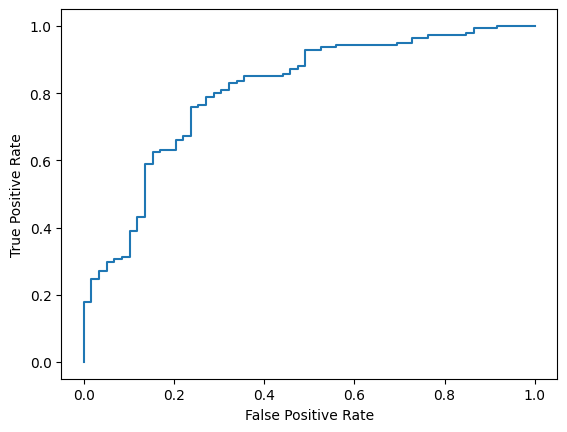

In [946]:
fpr_test, tpr_test, _  = roc_curve(y_test, pred_test_probabilities)
roc_display = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test).plot()

The plot shows the relationship between the number of false positive results (FPR) and true positive results (TPR) depending on the threshold value.

In [947]:
model_roc_auc = roc_auc_score(y_test,predictions_test) 
print ("Area under curve: ", round(model_roc_auc,2))

Area under curve:  0.7


The value of 0.70 indicates that the model is able to distinguish between the classes better than a random binary classifier, but the result is only moderate. AUC always takes values between 0 and 1, where a result of 0.5 means that the model is able to distinguish between the classes as well as a random classifier, and a result above 0.5 means that the model is better than a random classifier.

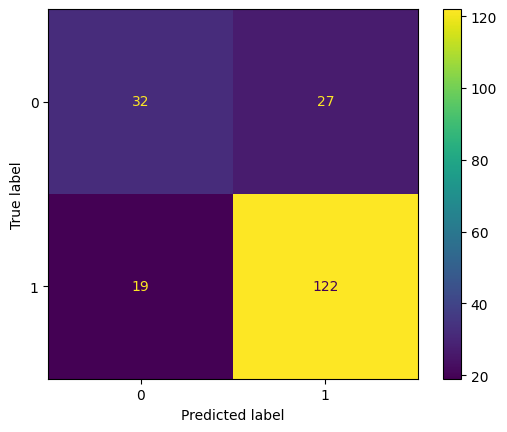

In [948]:
cm_test = confusion_matrix(y_test, predictions_test)
cm_display = ConfusionMatrixDisplay(cm_test).plot()

<b>Conclusion</b><br>
TN (true negatives) - 32 <br>
FP (false positives) - 27 <br>
FN (false negatives) - 19 <br>
TN (true positives) - 122 <br>

The value of TP is significantly higher than the value of FP, suggesting that the model is able to correctly classify positive cases.
The results suggest that the model may have some problems with classifying negative cases, as we have a small difference between TN and FN classification.

In [949]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.63      0.54      0.58        59
           1       0.82      0.87      0.84       141

    accuracy                           0.77       200
   macro avg       0.72      0.70      0.71       200
weighted avg       0.76      0.77      0.76       200



<b>Conclusion:</b><br>
- Precision is average for class 0, but high for class 1.<br>
- Recall is high for class 1, but average for class 0.<br>
- F1-score is average for class 0, but high for class 1.<br>
- Accuracy is 0.77, which means the model correctly classified 77% of the samples.<br>

The model has good ability to classify positive cases (class 1), but may need improvement in classifying negative cases (class 0). 

####  Evaluation for train set

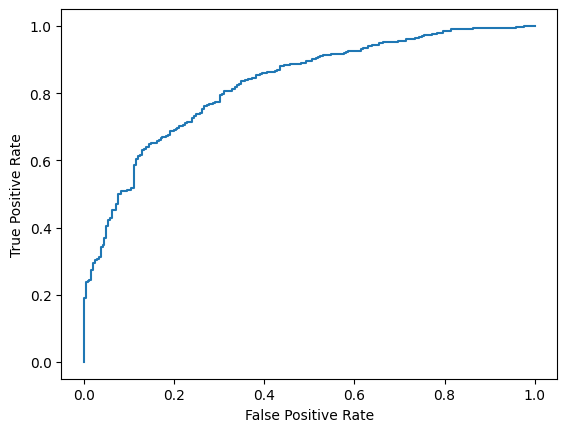

In [950]:
fpr_train, tpr_train, _  = roc_curve(y_train, pred_train_probabilities)
roc_display = RocCurveDisplay(fpr=fpr_train, tpr=tpr_train).plot()

The plot shows the relationship between the number of false positive results (FPR) and true positive results (TPR) depending on the threshold value.

In [951]:
model_roc_auc2 = roc_auc_score(y_train,predictions_train) 
print ("Area under curve: ", round(model_roc_auc2,2))

Area under curve:  0.71


The value of 0.71 indicates that the model is able to distinguish between the classes better than a random binary classifier, but the result is only moderate. AUC always takes values between 0 and 1, where a result of 0.5 means that the model is able to distinguish between the classes as well as a random classifier, and a result above 0.5 means that the model is better than a random classifier.

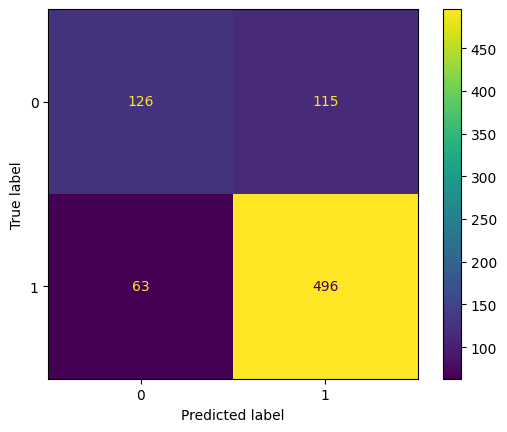

In [952]:
cm_train = confusion_matrix(y_train, predictions_train)
cm_display = ConfusionMatrixDisplay(cm_train).plot()

<b>Conclusion</b><br>
TP (true positives) - 496 <br>
FP (false positives) - 115 <br>
FN (false negatives) - 63 <br>
TN (true negatives) - 126 <br>

The value of TP is significantly higher than the value of FP, suggesting that the model is able to correctly classify positive cases.
The results suggest that the model may have some problems with classifying negative cases, as we have a small difference between TN and FN classification.

In [953]:
print(classification_report(predictions_train,y_train))

              precision    recall  f1-score   support

           0       0.52      0.67      0.59       189
           1       0.89      0.81      0.85       611

    accuracy                           0.78       800
   macro avg       0.71      0.74      0.72       800
weighted avg       0.80      0.78      0.79       800



<b>Conclusion:</b><br>
- Precision is average for class 0, but high for class 1.<br>
- Recall is high for class 1, but average for class 0.<br>
- F1-score is average for class 0, but high for class 1.<br>
- Accuracy is 0.78, which means the model correctly classified 78% of the samples.<br><br>
The model has good ability to classify positive cases (class 1), but may need improvement in classifying negative cases (class 0).

## Decision Tree

In [955]:
cleaned2.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_0<=X<200,checking_status_<0,checking_status_>=200,checking_status_no checking,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining,purpose_used car,savings_status_100<=X<500,savings_status_500<=X<1000,savings_status_<100,savings_status_>=1000,savings_status_no known savings,employment_1<=X<4,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,personal_status_female div/dep/mar,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,other_parties_co applicant,other_parties_guarantor,other_parties_none,property_magnitude_car,property_magnitude_life insurance,property_magnitude_no known property,property_magnitude_real estate,other_payment_plans_bank,other_payment_plans_none,other_payment_plans_stores,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident,own_telephone_none,own_telephone_yes,foreign_worker_no,foreign_worker_yes,class
0,6,1169,4,4,67,2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1
1,48,5951,2,2,22,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1
3,42,7882,2,4,45,1,2,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1
4,24,4870,3,4,53,2,2,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0


In [956]:
# Set X and y variables from the dataframe
X_t = cleaned2.iloc[:,:-1]
y_t = cleaned2.iloc[:,-1]

## Training and predicting

In [957]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size = 0.25, random_state=42)

In [958]:
tree = DecisionTreeClassifier().fit(X_train_t, y_train_t)

In [959]:
print("Accuracy on training set: {:.2f}".format(tree.score(X_train_t, y_train_t)))
print("Accuracy on test set: {:.2f}".format(tree.score(X_test_t, y_test_t)))

Accuracy on training set: 1.00
Accuracy on test set: 0.69


<b>Conclusion:</b>

The results suggest that the model may be overfitting because the accuracy on the training set is 1, which means that the model correctly classified all samples from the training set. However, the accuracy on the test set is 0.69, which suggests that the model may have difficulty generalizing to new data.

It may be necessary to apply regularization methods or reduce the complexity of the model to avoid overfitting to the training data.

### Tuning the parameters of a decision tree using GridSearchCV

In [960]:
param_grid = {"max_depth": list(range(1, 4)),
               "min_samples_split": list(range(1, 6)),
               "min_samples_leaf": list(range(1, 6))
                                        }

param_grid

{'max_depth': [1, 2, 3],
 'min_samples_split': [1, 2, 3, 4, 5],
 'min_samples_leaf': [1, 2, 3, 4, 5]}

In [961]:
rf_classifier = DecisionTreeClassifier()

grid_search = GridSearchCV(rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_t, y_t)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [962]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 1}

### Evaluation

In [963]:
tree_clf2 = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
tree_clf2.fit(X_train_t, y_train_t)

print("Accuracy on training set: {:.2f}".format(tree_clf2.score(X_train_t, y_train_t)))
print("Accuracy on test set: {:.2f}".format(tree_clf2.score(X_test_t, y_test_t)))

Accuracy on training set: 0.74
Accuracy on test set: 0.75


<b>Conclusion:</b><br>The model achieved an accuracy of 74% on the training set and 75% on the test set, which suggests that the model is performing well and generalizes well to new data. 

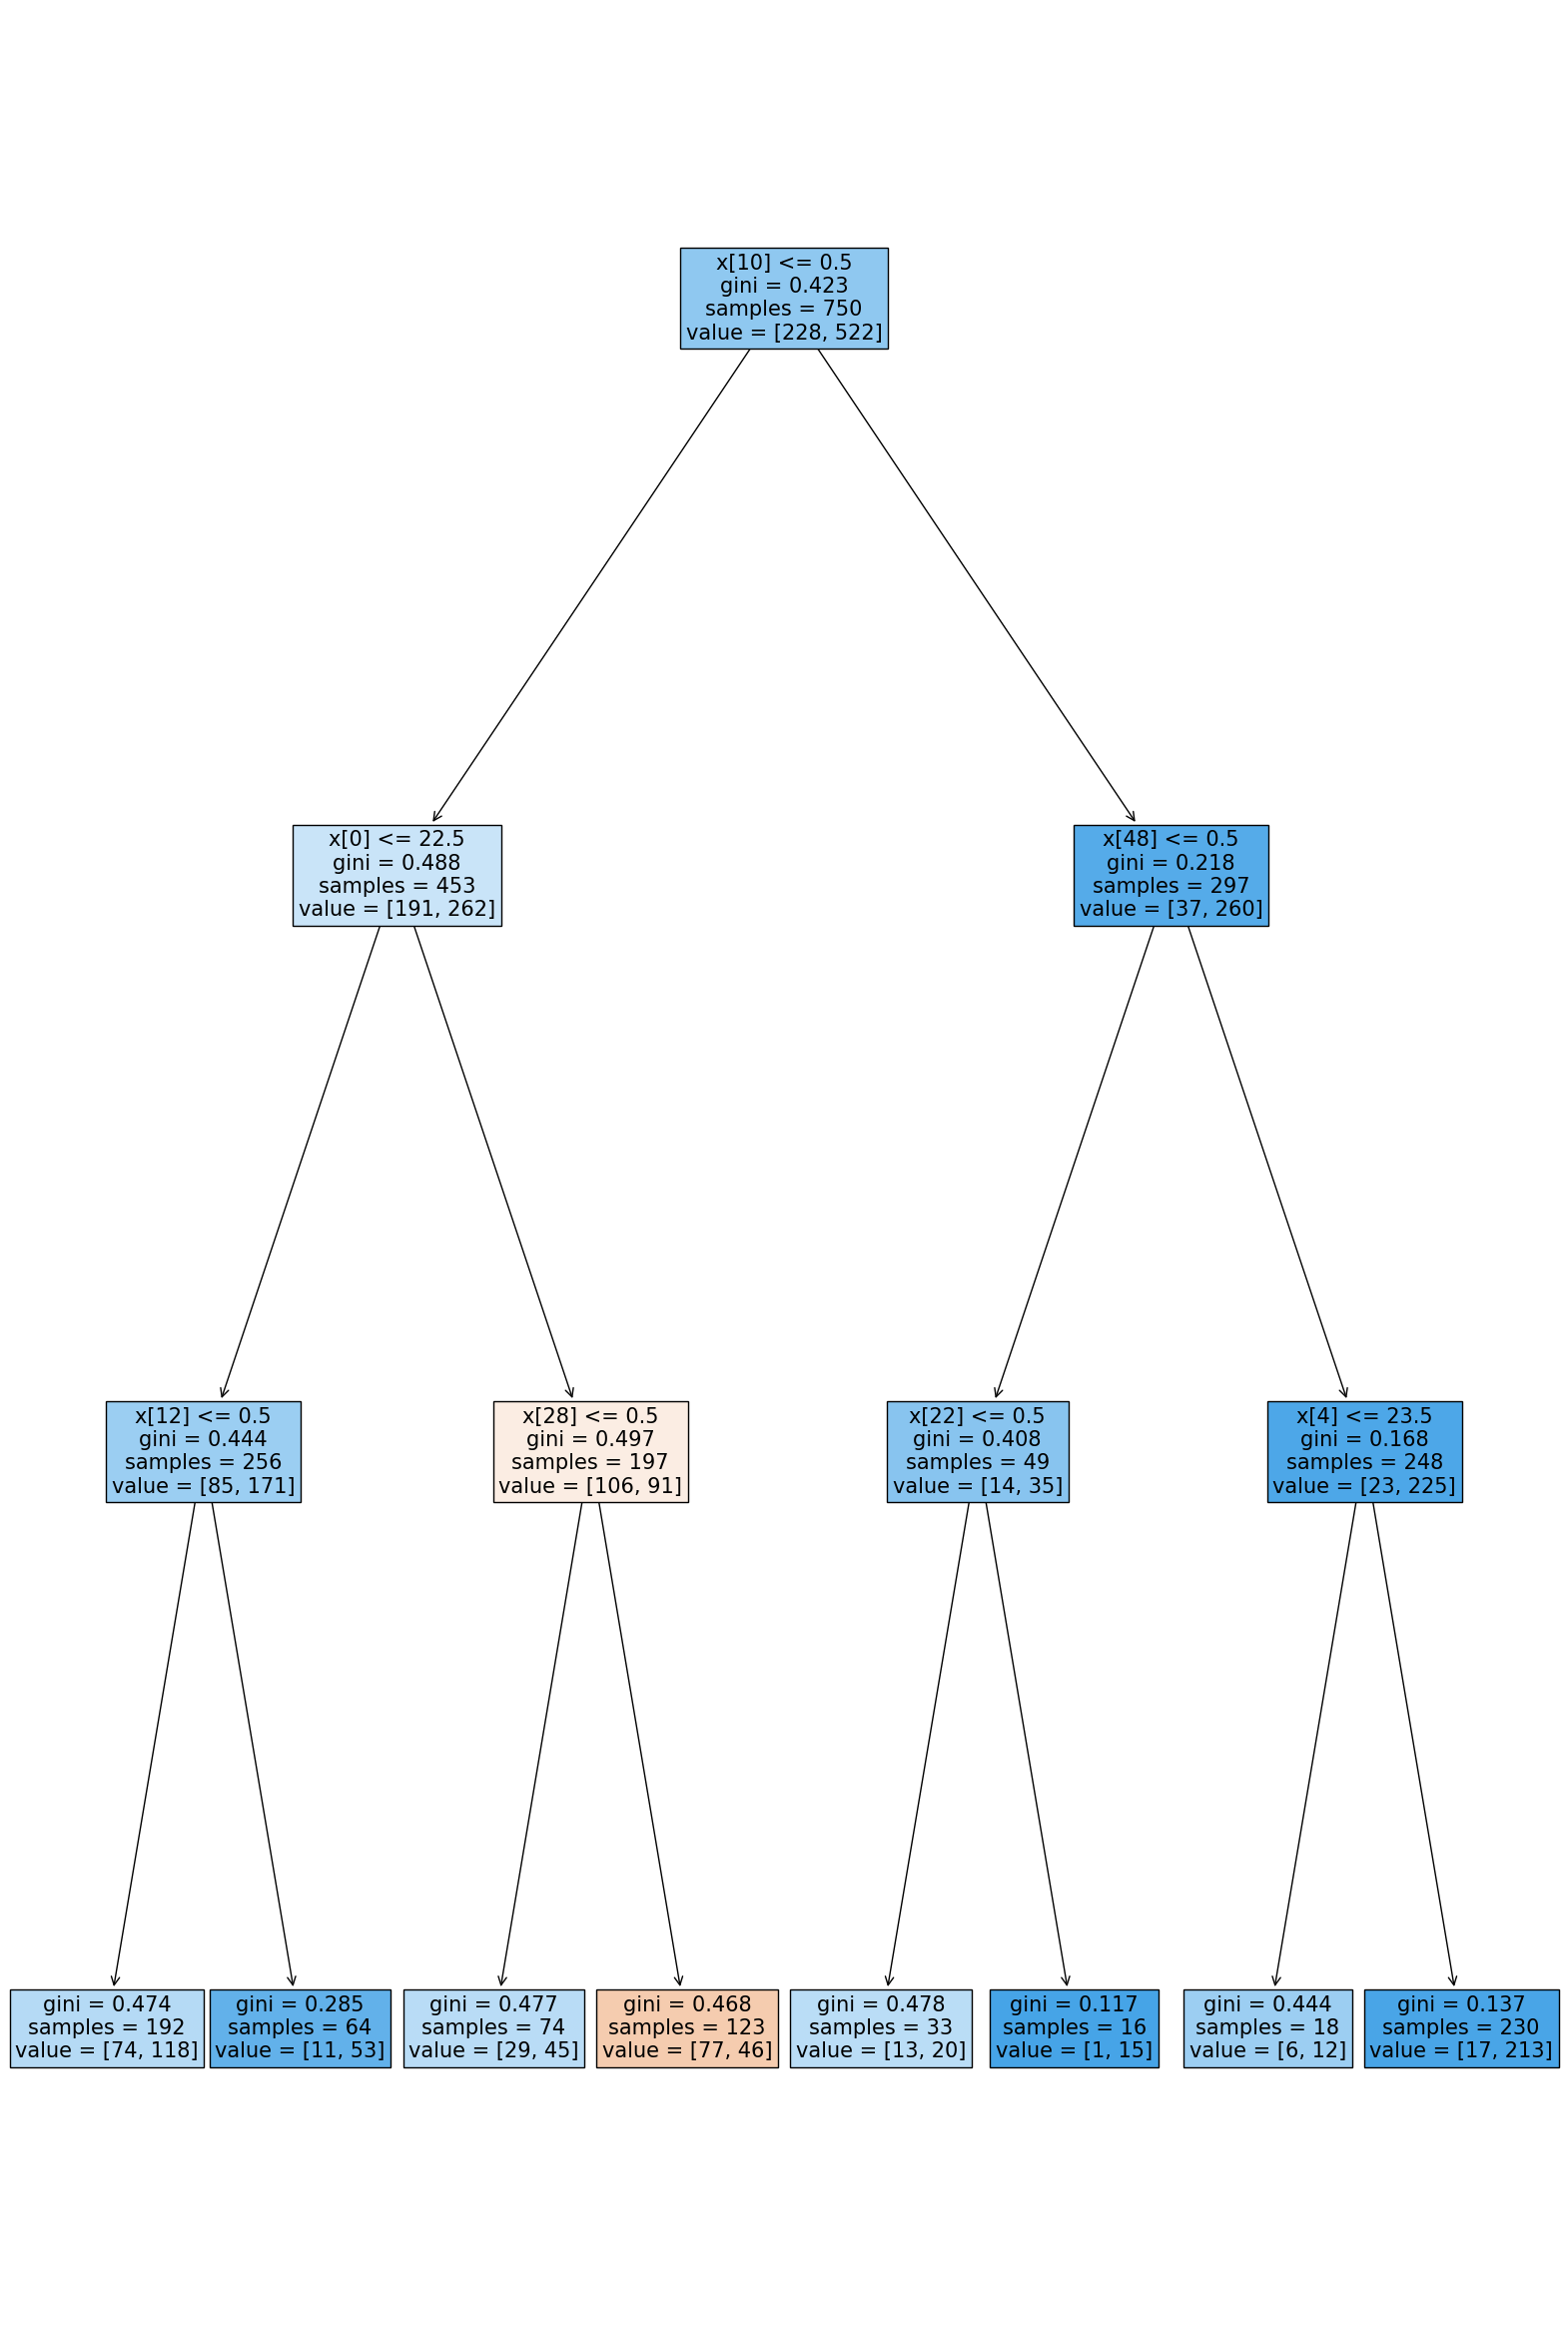

In [964]:
plt.figure(figsize=(20,30))
plot_tree(tree_clf2,fontsize=15, filled=True)
plt.show()

### Evaluation for test set

In [965]:
prediction_test=tree_clf2.predict(X_test_t) 
prediction_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0])

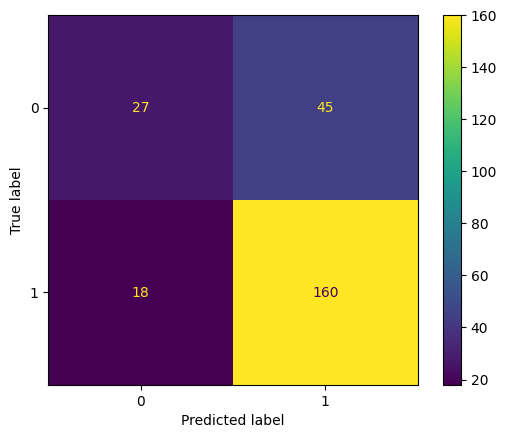

In [966]:
cm_train = confusion_matrix(y_test_t, prediction_test)
cm_display = ConfusionMatrixDisplay(cm_train).plot()

<b>Conclusion:</b><br>

TP (true positives)  - 160 <br>
FP (false positives) - 45<br>
FN (false negatives) - 18<br>
TN (true negatives) - 27 <br>

The value of TP is significantly higher than the value of FP, suggesting that the model is able to correctly classify positive cases.
The results suggest that the model may have some problems with classifying negative cases, as we have a small difference between TN and FN classification.

In [754]:
# Classification report for test set
print(classification_report(y_test_t, prediction_test))

              precision    recall  f1-score   support

           0       0.60      0.38      0.46        72
           1       0.78      0.90      0.84       178

    accuracy                           0.75       250
   macro avg       0.69      0.64      0.65       250
weighted avg       0.73      0.75      0.73       250



<b>Conclusion</b><br>
- Precision for class 0 is 0.6, which means that 60% of cases classified as class 0 were correct.
- Recall for class 1 is 0.90, which means that 90% of class 1 cases were correctly classified.<br>
- The F1-score for class 1 is 0.84, indicating a good balance between precision and recall.<br>
- Accuracy is 0.75, which means the model correctly classified 75% of cases.<br>

### Evaluation for test set

In [755]:
prediction_train=tree_clf2.predict(X_train_t) 
prediction_train

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

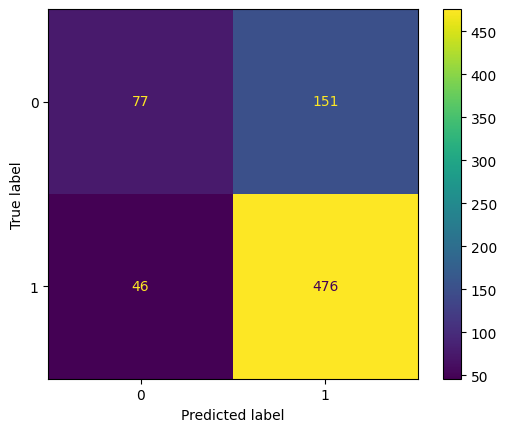

In [756]:
cm_train = confusion_matrix(y_train_t, prediction_train)
cm_display = ConfusionMatrixDisplay(cm_train).plot()

<b>Conclusion:</b><br>

TP (true positives)  - 476 <br>
FP (false positives) - 151<br>
FN (false negatives) - 46<br>
TN (true negatives) - 77 <br>

The value of TP is significantly higher than the value of FP, suggesting that the model is able to correctly classify positive cases.
The results suggest that the model may have some problems with classifying negative cases, as we have a small difference between TN and FN classification.

In [967]:
# Classification report for train set
print(classification_report(y_train_t, prediction_train))

              precision    recall  f1-score   support

           0       0.63      0.34      0.44       228
           1       0.76      0.91      0.83       522

    accuracy                           0.74       750
   macro avg       0.69      0.62      0.63       750
weighted avg       0.72      0.74      0.71       750



<b>Conclusion</b><br>
- The overall accuracy of the model is 74% for the train set.<br>
- The model achieves higher precision and recall for class 1 than for class 0.<br>
- The harmonic mean of precision and recall (F1-score) for class 0 is 0.44, while for class 1 it is 0.83.<br>
- There are 228 instances of class 0 and 522 instances of class 1 in the test set.<br>

In [968]:
from sklearn.metrics import mean_squared_error

MSE_tree = mean_squared_error(y_test_t, prediction_test)
print(f"Mean squared error on the test set for the decision tree {MSE_tree}")

MSE_tree2 = mean_squared_error(y_train_t, prediction_train)
print(f"Mean squared error on the train set for the decision tree {MSE_tree}")

Mean squared error on the test set for the decision tree 0.252
Mean squared error on the train set for the decision tree 0.252


<b>Conclusion:</b><br>
The mean squared error on the test and train sets for the decision tree is 0.252, which means that the average squared difference between the actual and predicted values is relatively low, suggesting that the model is performing well in making predictions. 

# Comparison of results for decision tree and logistic regression

### Classification report for test set (logistic regression)

In [970]:
# Classification report for test set (logistic regression)
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.63      0.54      0.58        59
           1       0.82      0.87      0.84       141

    accuracy                           0.77       200
   macro avg       0.72      0.70      0.71       200
weighted avg       0.76      0.77      0.76       200



### Classification report for test set (decision tree)

In [969]:
# Classification report for test set (decision tree)
print(classification_report(y_test_t, prediction_test))

              precision    recall  f1-score   support

           0       0.60      0.38      0.46        72
           1       0.78      0.90      0.84       178

    accuracy                           0.75       250
   macro avg       0.69      0.64      0.65       250
weighted avg       0.73      0.75      0.73       250



<b>Conclusion:</b><br>
- The logistic regression model has better results for class 0 (precision, recall, and f1-score are 0.63, 0.54, and 0.58 for logistic regression, and 0.60, 0.38, and 0.46 for decision tree)<br>
- The decision tree model has slightly better results for class 1 (precision, recall, and f1-score are 0.78, 0.90, and 0.84 for decision tree, and 0.82, 0.87, and 0.84 for logistic regression) <br>
- The accuracy metric is slightly better for logistic regression (0.77 compared to 0.75 for decision tree)

From a bank's perspective, the most important thing for me as a lender would be to minimize the number of false positives cases where a person receives a loan but actually should not have due to having a low creditworthiness and a risk of defaulting on the loan.

Therefore, I would focus on the recall metric, which tells us how often the model correctly identifies individuals with low creditworthiness and a risk of defaulting on the loan. It is also important to check the precision metric, which tells us how often the model correctly decides to grant a loan. Minimizing the number of false positives is crucial for the risk of loan default.

In this case, I would choose the logistic regression model because the recall and precision for predicting 0 and 1 class are slightly better.